# <center> Analysing Historical Global Tempratures & Sea Rise via Machine Learning 

## <center> Abstract

#### Main objective of this case study is to: 
#### Analyse historical global tempratures and its cause and affect to prove that global warming is very real threat and how rise in global temprature is affecting rise in sea level.
<br><br>
#### Data-science project life cycle used:
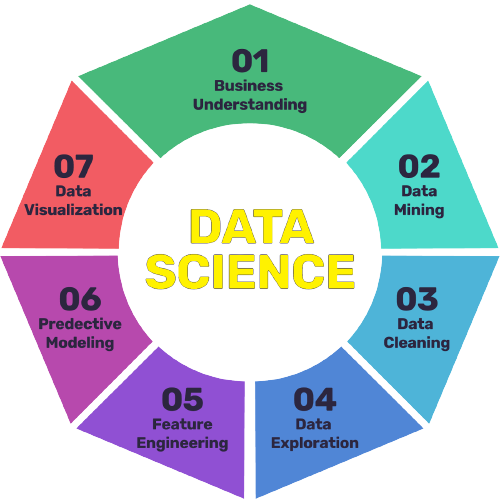

## <center> Index
1. [Business Understanding](#1)
2. [Data Gathering](#2)
3. [Data Cleaning](#3)
4. [Data Exploration](#4)
	- Finding yearly average and calculating Heat level using yearly average temperature
	- Analyzing Average, Minimum and Maximum Temperature since Year 1800
	- Analyzing data trend using Linear Regression, Polynomial Regression, Correlation Matrix, Random Forest, XGBoost and Nearest neighbors
5. [Feature Engineering](#5)
	- Attempt to minimize the MED
	- Features importance
	- Adding New variables and decreasing of the MED
6. [Predictive Data Modeling](#6)
	- Random Forest
	- XGBoost
7. [Clustering](#7)
	- Country Clustering
	- 1st Clustering
	- 2nd Clustering
8. [Data Visualization](#8)
	- Conclusion on multiple cities
	- Growth of global Fossil fuels consumption
	- Global mean sea levels over years
	- Does the rise in average temperature related to global higher temperatures?
	- Hottest Year on Record?
	- Hottest Decade on Record?
	- Are global sea levels rising?
	- Is ocean warming real? If true then show temperatures per decade over the past 100 years
	- Annual Per capita CO2 emissions
	- Total carbon footprint
	- Carbon emissions from 2000 to 2010 from different sources
	- Surface maximum and minimum temperature over 5 years
	- How much global average surface temperature has increased since 1880?
	- Is sea level rising? If yes then show change in global sea levels
	- Main sources of Carbon emissions
	- Ocean's rate of heating?
9. [Inferences and Conclusion](#9)

## <center> Business Understanding

<img src="https://ocw.mit.edu/courses/cms-631-data-storytelling-studio-climate-change-spring-2017/6a102252006ddb7f4bc6e80ad8e90199_cms-631s17.gif"     alt="Historical Temperature Change"     style="float: left; margin-right: 50px;width:300px;height:300px;" />


Climate change is one of the important issues that face the world in this technological era. The best proof of this situation is the historical temperature change (It is shown in left figure(https://ocw.mit.edu/courses/comparative-media-studies-writing/cms-631-data-storytelling-studio-climate-change-spring-2017/#)). <br><br> This Case study investigates the reality of the increase in temperatures linked to industrial activities and the greenhouse effect. And before this investigation, the aim of this part enlight the significant sides of the temperature change data for each area. Before beginning the analysis, firstly, I want to figure out our problem, its cause and its effects in a short way. 
 
 #### What is Climate Change?
 
"_Climate change is a long-term change in the average weather patterns that have come to define Earth’s local, regional and global climates. Changes observed in Earth’s climate since the early 20th century are primarily driven by human activities, particularly fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth’s atmosphere, raising Earth’s average surface temperature. These human-produced temperature increases are commonly referred to as global warming._"
 <br><br><br>
 ##### Causes
"_According to NASA, Water Vapour, Carbon dioxide(CO₂), Methane, Nitrous oxide, Chlorofluorocarbons(CFCs) contribute to the greenhouse effect. Over the last century, human activities have increased concentrations of this natural greenhouse._"
 
 ##### Effects:

"_Global climate change has already had observable effects on the environment. Glaciers have shrunk, ice on rivers and lakes is breaking up earlier, plant and animal ranges have shifted, and trees are flowering sooner. Effects that scientists had predicted in the past would result from global climate change: loss of sea ice accelerated sea-level rise and longer, more intense heat waves._(https://climate.nasa.gov/effects/)"

This section mainly covers defining goals of this case study and understanding its requirements
#### Goals of this project:
1. [Analysing historical global min-max-mean temprature from land and ocean](#1)
2. [Predicting global average temprature using various machine learning models](#2)
3. [Analysing climate change in Paris using historical paris temprature](#3)
4. [Visualizing cause(via AQI) and affect(rising sea level) of climate change](#4)

#### Importing Python libraries neccessary for this case study

In [1]:
import pandas as pd
from pandas import Series, DataFrame
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
import seaborn as sns
import matplotlib.dates as mdates
import bokeh as bk
sns.set_style('whitegrid')
%matplotlib inline
import copy

# machine learning sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from xgboost import XGBRegressor
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

## <center> Data Gathering

There are 6 files used for this case study. Source: http://berkeleyearth.org/data/
1. [GlobalTemperatures.csv](#1)
2. [GlobalLandTemperaturesByMajorCity.csv](#2)
3. [GlobalLandTemperaturesByCountry.csv](#3)
4. [co2-mm-mlo.csv](#4)
5. [global_co2.csv](#5)
6. [CSIRO_gmsl.csv](#6)

<br>

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

* [**Date**](#1): starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
* [**LandAverageTemperature**](#1): global average land temperature in celsius
* [**LandAverageTemperatureUncertainty**](#1): the 95% confidence interval around the average
* [**LandMaxTemperature**](#1): global average maximum land temperature in celsius
* [**LandMaxTemperatureUncertainty**](#1): the 95% confidence interval around the maximum land temperature
* [**LandMinTemperature**](#1): global average minimum land temperature in celsius
* [**LandMinTemperatureUncertainty**](#1): the 95% confidence interval around the minimum land temperature
* [**LandAndOceanAverageTemperature**](#1): global average land and ocean temperature in celsius
* [**LandAndOceanAverageTemperatureUncertainty**](#1): the 95% confidence interval around the global average land and ocean temperature

<br>
GlobalLandTemperaturesByMajorCity.csv:

* [**dt**](#1): Date
* [**AverageTemperature**](#1): Global average land and ocean temperature in celsius
* [**AverageTemperatureUncertainty**](#1): The 95% confidence interval around the average
* [**City**](#1): City Name
* [**Country**](#1): Country Name
* [**Latitude**](#1): Latitude coordinate
* [**Longitude**](#1): Longitude coordinate

<br>
GlobalLandTemperaturesByCountry.csv:

* [**dt**](#1): Date
* [**AverageTemperature**](#1): Global average land and ocean temperature in celsius
* [**AverageTemperatureUncertainty**](#1): tThe 95% confidence interval around the average
* [**Country**](#1): Country Name

<br>
co2-mm-mlo.csv: 

* [**Date**](#1): Date
* [**Decimal Date**](#1): Date in decimal
* [**Average**](#1): The monthly mean CO2 mole fraction determined from daily averages. If there are missing days concentrated either early or late in the month, the monthly mean is corrected to the middle of the month using the average seasonal cycle. Missing months are denoted by -99.99.
* [**Interpolated**](#1): Values from the average column and interpolated values where data are missing. Interpolated values are computed in two steps. First, we compute for each month the average seasonal cycle in a 7-year window around each monthly value. In this way the seasonal cycle is allowed to change slowly over time. We then determine the trend value for each month by removing the seasonal cycle; this result is shown in the trend column. Trend values are linearly interpolated for missing months. The interpolated monthly mean is then the sum of the average seasonal cycle value and the trend value for the missing month.
* [**Trend**](#1): Seasonally corrected Trends in Atmospheric Carbon Dioxide
* [**Number of Days**](#1): -1 denotes no data for number of daily averages in the month.

<br>
CSIRO_gmsl.csv:

* [**Time**](#1): Date
* [**GMSL (mm)**](#1): Annual Global Mean Sea Levels
* [**GMSL uncertainty (mm)**](#1): Uncertainity in Annual Global Mean Sea Levels

<br>
global_co2.csv:

* [**Time**](#1)
* [**Total carbon emissions from fossil fuel consumption and cement production (mil. metric tons of C)**](#1)
* [**Carbon emissions from gas fuel consumption**](#1)
* [**Carbon emissions from liquid fuel consumption**](#1)
* [**Carbon emissions from solid fuel consumption**](#1)
* [**Carbon emissions from cement production	Carbon emissions from gas flaring**](#1)
* [**Per capita carbon emissions (metric tons of carbon; after 1949 only)**](#1)

In [3]:
# get global temp csv file as a DataFrame
global_temps = pd.read_csv("input/GlobalTemperatures.csv", sep=',')
global_temps2 = copy.deepcopy(global_temps)
global_temps.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [4]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


### Analysis
**There are 9 columns and there are 12 rows with all null values. We will drop these rows and unneccesary columns**

## <center> Data Cleaning

In [5]:
# Delete all columns except dates, Land Average Temperatures, Land Average Temperature Uncertainty
global_temps=global_temps.drop(global_temps.columns[3:], axis=1)

#Delete all empty lines
global_temps=global_temps.dropna()

In [6]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dt                                 3180 non-null   object 
 1   LandAverageTemperature             3180 non-null   float64
 2   LandAverageTemperatureUncertainty  3180 non-null   float64
dtypes: float64(2), object(1)
memory usage: 99.4+ KB


In [7]:
global_temps.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3180.000000,3180.000000
mean,8.374731,0.938468
std,4.381310,1.096440
min,-2.080000,0.034000
25%,4.312000,0.186750
50%,8.610500,0.392000
75%,12.548250,1.419250
max,19.021000,7.880000


## <center> Data Exploration 

### Finding yearly average and calculating Heat level using yearly average temperature

In [8]:

df = copy.deepcopy(global_temps)
df['dt'] = df['dt'].apply(lambda x: x[:4])
df_global_mean = df.groupby(['dt']).agg({'LandAverageTemperature': np.mean,
                             'LandAverageTemperatureUncertainty': np.mean})

#Defining a function that classifies the average temperatures 
def heat(x):

    if type(x) is str:
        return x
    elif x<=7:
        return 3
    elif x>7 and x<=8:
        return 2
    else:
        return 1

#Adding the heat function
df_global_mean['Heat'] = df_global_mean['LandAverageTemperature'].apply(heat)
df_global_mean.reset_index(inplace=True)
df_global_mean.rename(columns = {'LandAverageTemperature':'Temperatures', 
                      'LandAverageTemperatureUncertainty':'Uncertainty', 
                      'dt':'Dates'}, inplace = True)
print(df_global_mean.head())

  Dates  Temperatures  Uncertainty  Heat
0  1750      8.719364     2.637818     1
1  1751      7.976143     2.781143     2
2  1752      5.779833     2.977000     3
3  1753      8.388083     3.176000     1
4  1754      8.469333     3.494250     1


In [9]:
print(str(max(df_global_mean['Dates'])), str(min(df_global_mean['Dates'])))

2015 1750


In [10]:
#Global Average Temperatures plot using Bokeh

output_notebook()
tools_to_show = 'box_zoom,save,hover,reset'
t = "Evolution of average global land temperatures from 1750 to 2015"
p = figure(title=t, x_axis_label='Dates', y_axis_label='Temperatures', tools=tools_to_show)
p.scatter(x='Dates', y='Temperatures', source=df_global_mean)
show(p)

Loading BokehJS ...

### Analysis
**As we can clearly see global mean temprature is increasing at a very high rate as year passes.**

In [11]:
#Now, we plot the 95% Uncertainty regarding the temperature evolution
output_notebook()
tools_to_show = 'box_zoom,save,hover,reset'
(x, y) = (df_global_mean['Dates'], df_global_mean['Uncertainty'])

# Basic plot setup
p = figure(width=800, height=600, toolbar_location=None, 
           title='A clear decreasing of uncertainty')

p.line(x, y, line_dash="4 4", line_width=1, color='gray')


# Add a circle, that is visible only when selected
source = ColumnDataSource({'x': x, 'y': y})
invisible_circle = Circle(x='x', y='y', fill_color='gray', fill_alpha=0.05, line_color=None, size=20)
visible_circle = Circle(x='x', y='y', fill_color='firebrick', fill_alpha=0.5, line_color=None, size=20)
cr = p.add_glyph(source, invisible_circle, selection_glyph=visible_circle, nonselection_glyph=invisible_circle)

# Add a hover tool, that selects the circle
code = "source.set('selected', cb_data['index']);"
callback = CustomJS(args={'source': source}, code=code)
p.add_tools(HoverTool(tooltips=None, callback=callback, renderers=[cr], mode='hline'))

show(p)

Loading BokehJS ...

### Analysis
**As we can clearly see global mean Uncertainty Temprature is decreasing at a very high rate as year passes.**

In [12]:
global_temps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [13]:
global_temps2.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
date=global_temps2['dt'].apply(lambda x: x[:4])

global_temps2['dt'] = global_temps2['dt'].apply(lambda x: x[:4])
years=np.unique(global_temps2['dt'])
list_of_years_1800 = list(filter(lambda x: int(x) >= 1800, years))
global_temps2['dt'] = pd.to_numeric(global_temps2['dt'])
global_temps2.drop(global_temps2[global_temps2.dt < 1800].index, inplace=True)
global_temps_1800 = global_temps2.groupby(['dt']).agg({'LandAverageTemperature': np.mean,
                                         'LandMinTemperature': np.mean,
                                         'LandMaxTemperature': np.mean})
global_temps_1800.reset_index(inplace=True)
global_temps_1800.rename(columns = {'LandAverageTemperature':'Average Temperature', 
                      'LandMinTemperature':'Min Temperature', 
                      'LandMaxTemperature':'Max Temperature', 
                      'dt':'Dates'}, inplace = True)
global_temps_1800.head(5)

,Dates,Average Temperature,Min Temperature,Max Temperature
0,1800,8.484250,NaN,NaN
1,1801,8.589667,NaN,NaN
2,1802,8.578167,NaN,NaN
3,1803,8.503000,NaN,NaN
4,1804,8.844833,NaN,NaN


### Analyzing Average, Minimum and Maximum Temprature since Year 1800

In [15]:
output_notebook()

x = global_temps_1800['Dates']
y = global_temps_1800['Average Temperature']
z = global_temps_1800['Min Temperature']
t = global_temps_1800['Max Temperature']

p = figure(plot_width=600, plot_height=600)

p.line(x, y, legend_label="Average Temperature", line_color="green", line_width=3)

p.line(x,z, legend_label="Min Temperature", line_color="blue", line_width=3)

p.line(x, t, legend_label="Max Temperature", line_color="red", line_width=3)

# change just some things about the x-grid
p.xgrid.band_fill_alpha = 0.05
p.xgrid.band_fill_color = "navy"

p.legend.location = "top_left"
p.legend.glyph_width = 2
p.legend.label_width=2
show(p)

Loading BokehJS ...

### Analysis
**As we can clearly see global average, minimum and maximum temprature is increasing at a very high rate as year passes.**

### Linear Regression
#### X = years Y = Average Temprature

In [16]:
#Regression on all the data (without prediction) => See if a regression can be a good estimation

#Define the input and output
temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']
# The data sets
dates_X = time.iloc[0:,]
print("X = \n")
print(dates_X[:5])
# The targets 
temperature_y = temp.iloc[0:,]
print("Y = \n")
print(temperature_y[:5])

X = 

0    1800
1    1801
2    1802
3    1803
4    1804
Name: Dates, dtype: int64
Y = 

0    8.484250
1    8.589667
2    8.578167
3    8.503000
4    8.844833
Name: Average Temperature, dtype: float64


In [17]:
# Create linear regression object
reg = linear_model.LinearRegression()
# Train the model using the data sets
reg.fit(dates_X.to_frame(),temperature_y.to_frame())

# The estimation
output_reg=reg.predict(dates_X.to_frame())
output_simple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(dates_X.to_frame()) - temperature_y.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X.to_frame(), temperature_y.to_frame()))


Coefficients: 
 [[0.00721859]]
Intercept: 
 [-5.35578585]
Mean squared error: 0.12
Variance score: 0.64


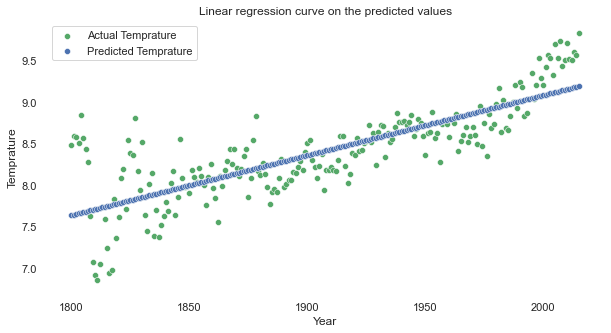

In [18]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
date_temp = pd.DataFrame({'dates_X':dates_X, 'temperature_y':temperature_y})
date_output = pd.DataFrame({'dates_X':dates_X, 'output_simple':output_simple.ravel().tolist()})
fig, ax = plt.subplots(figsize=(10,5))
actual = sns.scatterplot(x='dates_X', y='temperature_y', data=date_temp, color='g', 
                      label='Actual Temprature')
predicted = sns.scatterplot(x='dates_X', y='output_simple', data=date_output, color='b', 
                         label='Predicted Temprature')
plt.xlabel("Year")
plt.ylabel("Temprature")
plt.title("Linear regression curve on the predicted values")
plt.legend()
plt.show()

### Linear Regression
#### X = years Y = Average Temprature

In [19]:


dates_X_train, dates_X_test, temperature_y_train, temperature_y_test = train_test_split(time, 
                                                                        temp, 
                                                                        test_size = 0.32, 
                                                                        random_state = 0,
                                                                        shuffle = False)
print(dates_X_train.min(), dates_X_train.max(), dates_X_test.min(), dates_X_test.max())
reg = linear_model.LinearRegression()
reg.fit(dates_X_train.to_frame(),temperature_y_train.to_frame())
# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(dates_X_train.to_frame(),temperature_y_train.to_frame())

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The prediction
output_simple=reg.predict(dates_X_test.to_frame())
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(dates_X_test.to_frame()) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X_test.to_frame(), temperature_y_test.to_frame()))

1800 1945 1946 2015
Coefficients: 
 [[0.00557041]]
Intercept: 
 [-2.27932684]
Mean squared error: 0.14
Variance score: 0.13


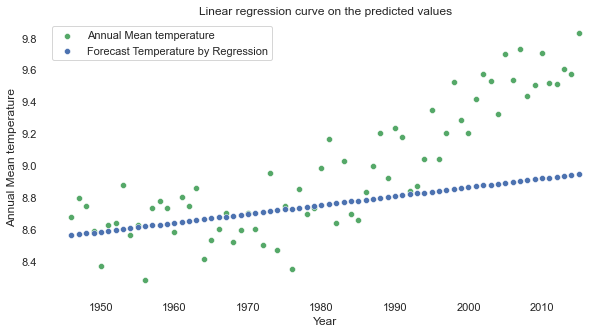

In [20]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
date_temp_test = pd.DataFrame({'dates_X_test':dates_X_test, 'temperature_y_test':temperature_y_test})
date_output_test = pd.DataFrame({'dates_X_test':dates_X_test, 'output_simple':output_simple.ravel().tolist()})
fig, ax = plt.subplots(figsize=(10,5))
actual = sns.scatterplot(x='dates_X_test', y='temperature_y_test', data=date_temp_test, color='g', label='Annual Mean temperature')
predicted = sns.scatterplot(x='dates_X_test', y='output_simple', data=date_output_test, color='b', label='Forecast Temperature by Regression')
plt.xlabel("Year")
plt.ylabel("Annual Mean temperature")
plt.title("Linear regression curve on the predicted values")
plt.legend()
plt.show()

### Analysis
**As we can clearly see global average temprature is increasing at a rate far from predicted rate since 1990**

### Polynomial Regression

In [21]:
#Polynomial Regression t^2 + t^3

#Regression on all the data (without prediction) => See if a regression can be a good estimation

#Define the input and output
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']
temp=global_temps_1800['Average Temperature']


# The data sets
dates_X = time.iloc[0:,0]

# The targets 
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:,],temperature_y.to_frame())

# The prediction
output_reg=reg.predict(time.iloc[0:,])
output_multiple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_multiple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((output_reg - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[0:,], temperature_y.to_frame()))

# Euclidian Distance
output['Predicted Temperature']=pd.DataFrame(output_multiple)
output["Average Temperature"]=temp

Coefficients: 
 [[ 1.54583760e+00 -8.43972200e-04  1.53912499e-07]]
Intercept: 
 [-937.81103858]
Mean squared error: 0.10
Variance score: 0.69


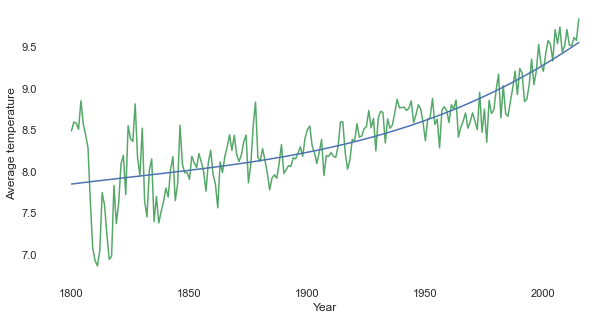

In [22]:
# Linear regression curve on the predicted values

# Multiple Linear Regression: t,t^2, t^3: Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature', fontsize=12)
axes.set_xlabel('Year', fontsize=12)
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_multiple,label='Forecast Reg',color='b')

In [23]:
#Polynomial Regression t^2 + t^3

#Define the input and output
temp=global_temps_1800['Average Temperature']
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']

dates_X_train, dates_X_test, temperature_y_train, temperature_y_test = train_test_split(time, 
                                                                        temp, 
                                                                        test_size = 0.32, 
                                                                        random_state = 0,
                                                                        shuffle = False)

#print(dates_X_train.min(), dates_X_train.max(), dates_X_test.min(), dates_X_test.max())
# Create linear regression object
reg = linear_model.LinearRegression()
# Train the model using the training sets
reg.fit(dates_X_train,temperature_y_train.to_frame())
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)
# The prediction
output_multiple=reg.predict(dates_X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(dates_X_test) - temperature_y_test.to_frame()) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X_test, temperature_y_test.to_frame()))

Coefficients: 
 [[-3.19371602e+00  1.65731673e-03 -2.85817763e-07]]
Intercept: 
 [2053.84193735]
Mean squared error: 0.08
Variance score: 0.47


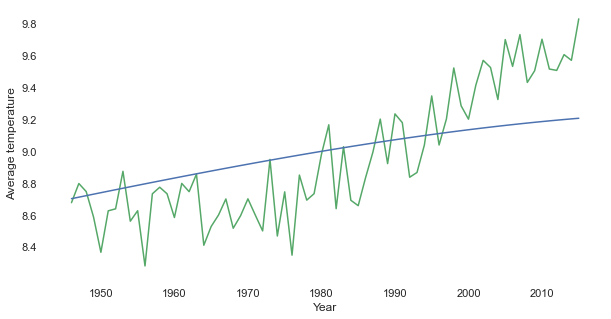

In [24]:
# Linear regression curve on the predicted values

# Multiple Linear Regression: t,t^2, t^3: Regression done on the values between 1800 and 1950 and testes between 1950 and 2016
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature', fontsize=12)
axes.set_xlabel('Year', fontsize=12)
# 
plt.plot(dates_X_test.iloc[:,0], temperature_y_test, label='Annual Mean temperature', color='g')
plt.plot(dates_X_test.iloc[:,0], output_multiple, label='Forecast Reg',color='b')


### Analysis
**As we can clearly see global average temprature is increasing at a rate far from predicted rate since 1990**

### Correlation Matrix


<AxesSubplot:>

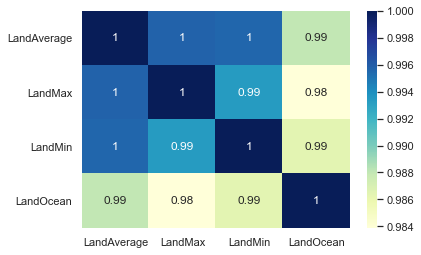

In [25]:
#Correlation Matrix for the following features : LandAverageTemperature, LandMaxTemperature, LandMinTemperature,LandAndOceanAverageTemperature

global_temperatures=pd.read_csv("input/GlobalTemperatures.csv", sep=',')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures = global_temperatures.drop(["LandAverageTemperatureUncertainty",
                                                "LandMaxTemperatureUncertainty",
                                                "LandMinTemperatureUncertainty",
                                                "LandAndOceanAverageTemperatureUncertainty"], axis=1)
global_temperatures=global_temperatures.dropna()
corr=global_temperatures.corr()

# Heatmap for the previous correlation matrix
sns.heatmap(corr,xticklabels=['LandAverage','LandMax','LandMin','LandOcean'], 
            yticklabels=['LandAverage','LandMax','LandMin','LandOcean'], annot=True, cmap="YlGnBu")


In [26]:
print("Minimum year:", global_temperatures['dt'].map(lambda x: x.year).min())
print("Maximum year:", global_temperatures['dt'].map(lambda x: x.year).max())

Minimum year: 1850
Maximum year: 2015


### Random Forest
Using temprature data before year 1980 to predict temprature from 1980 to 2015

In [27]:
# Train
train_df_copy=pd.DataFrame.copy(
    global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1],inplace=True)
train_df.head(5)

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
1201,1850-02-01,3.071,9.970,-2.291,13.588
1202,1850-03-01,4.954,10.347,-1.905,14.043
1203,1850-04-01,7.217,12.934,1.018,14.667
1204,1850-05-01,10.004,15.655,3.811,15.507
1205,1850-06-01,13.150,18.946,7.106,16.353


In [28]:
# To predict each average land temperature we use the previous year's temperatures (landandocean, min, max)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]

train_df.head(5)

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
1201,1850-02-01,0.749,8.242,-3.206,13.588
1202,1850-03-01,3.071,9.970,-2.291,14.043
1203,1850-04-01,4.954,10.347,-1.905,14.667
1204,1850-05-01,7.217,12.934,1.018,15.507
1205,1850-06-01,10.004,15.655,3.811,16.353


In [29]:
# Test
test_df_copy=pd.DataFrame.copy(
    global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt'],axis=1)
test_df.head(5)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
2761,2.956,8.468,-2.457,14.112
2762,3.652,9.260,-1.864,14.646
2763,5.367,11.240,-0.379,15.578
2764,8.935,14.821,3.109,16.314
2765,11.770,17.713,6.131,16.806


In [30]:
forest = RandomForestRegressor(n_estimators=10)
train_df=train_df.drop(['dt'],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

In [31]:
y_test = test_df['LandAverageTemperature']
y_pred = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

In [32]:
#Adding the predicted temperature to our output DF
test_df['Predicted_temp']=y_pred

In [33]:
print('Mean Euclidean Distance:',abs(y_test-y_pred).mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Euclidean Distance: 0.24383433874709998
Mean Absolute Error: 0.24383433874709995
Mean Squared Error: 0.11757370259860805
Root Mean Squared Error: 0.3428902194560353
R2 Square: 0.993122195331612


### XGBoost

In [34]:
# Train
train_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_2.index):
    for column in train_df_2.columns[1:-1]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
xgbr = XGBRegressor()
train_df_2=train_df_2.drop(['dt'],axis=1)
xgbr = xgbr.fit(train_df_2.drop(["LandAverageTemperature"],axis=1),train_df_2["LandAverageTemperature"])

In [35]:
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# Test
test_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)
# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_2.index):
    for column in test_df_2.columns[1:-1]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
test_df_2=test_df_2.drop(['dt'],axis=1)
y_test = test_df_2['LandAverageTemperature']
y_pred = xgbr.predict(test_df_2.drop(["LandAverageTemperature"],axis=1))

In [37]:
# Adding the predicted temperature to our output DF
test_df_2['Predicted_temp']=y_pred

In [38]:
print('Mean Euclidean Distance:',abs(y_test-y_pred).mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Euclidean Distance: 0.24781643837399955
Mean Absolute Error: 0.24781643837399941
Mean Squared Error: 0.11480838462418805
Root Mean Squared Error: 0.3388338599139526
R2 Square: 0.9932839603900704


### Nearest neighbors


In [39]:
# Train
neigh = KNeighborsRegressor(n_neighbors=2)
train_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_3=pd.DataFrame.copy(train_df_copy_3)
train_df_3.drop(train_df_3.index[:1], inplace=True)
train_df_copy_3.drop(train_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_3.index):
    for column in train_df_3.columns[1:-1]:
        train_df_3.loc[j,column]=train_df_copy_3.loc[j-1,column]
train_df_3=train_df_3.drop(['dt'],axis=1)
neighbors=neigh.fit(train_df_3.drop(["LandAverageTemperature"],axis=1),train_df_3["LandAverageTemperature"]) 

In [40]:
# Test
test_df_copy_3=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_3=pd.DataFrame.copy(test_df_copy_3)
test_df_3.drop(test_df_3.index[:1], inplace=True)
test_df_copy_3.drop(test_df_3.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_3.index):
    for column in test_df_3.columns[1:-1]:
        test_df_3.loc[j,column]=test_df_copy_3.loc[j-1,column]
test_df_3=test_df_3.drop(['dt'],axis=1)
y_test = test_df_3['LandAverageTemperature']
y_pred = neigh_output = neighbors.predict(test_df_3.drop(["LandAverageTemperature"],axis=1))

In [41]:
# Adding the predicted temperature to our output DF
test_df_3['Predicted_temp']=neigh_output

In [42]:
print('Mean Euclidean Distance:',abs(y_test-y_pred).mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Euclidean Distance: 0.23760904872389793
Mean Absolute Error: 0.23760904872389793
Mean Squared Error: 0.11978698433874707
Root Mean Squared Error: 0.346102563322994
R2 Square: 0.992992723186495


## <center> Feature Engineering

### Attempt to minimize the MED

In [43]:
#Definition of the function we want to minimize

def MED_XGB(n,maxi,learn,
       X_train, y_train, X_test,y_test,
       MED_limit):
    
    '''
    n         : n_estimators  -> Number of boosted trees to fit
    maxi      : max_depth     -> Maximum tree depth for base learners
    learn     : learning_rate -> Boosting learning rate
    ...
    MED_limit : -> threshold for minimum MED required
    '''
    
    xgb_model = xgboost.XGBRegressor(n_estimators = n , learning_rate = learn, max_depth = maxi )
    model_fit = xgb_model.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED , n, learn, maxi
    else:
        return 0

In [44]:
#### Data Sets ####

#Train
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]

train_df=train_df.drop(['dt'],axis=1)
    
#Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]

test_df=test_df.drop(['dt'],axis=1)


X_train = train_df.drop("LandAverageTemperature", axis = 1)
y_train = train_df['LandAverageTemperature']

X_test = test_df.drop("LandAverageTemperature", axis = 1)
y_test = test_df['LandAverageTemperature']

In [45]:
#### HyperParameters ####

max_depth = [2+i for i in range(5)]
learning_rate = [0.01*(i+1) for i in range(5)]
n_estimators = [370+i for i in range(20)]
MED_limit =  0.21
l=[]

In [46]:
#### Very long loop depending on parameters ####

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5] # 5 Best MED Results MED, n_estimators = n , learning_rate, max_depth

[(0.20242728570995633, 385, 0.04, 2),
 (0.2024370215962491, 386, 0.04, 2),
 (0.20244119143209427, 387, 0.04, 2),
 (0.20250209825166132, 384, 0.04, 2),
 (0.20251078753017762, 383, 0.04, 2)]

In [47]:
#### GridSearch (Take some time to compute) ####

from xgboost import plot_importance,to_graphviz, plot_tree
from sklearn.model_selection import GridSearchCV

'''xgb_model = xgboost.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_'''
'''
output:
(0.9925820953088234,
 {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 370})'''

"\noutput:\n(0.9925820953088234,\n {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 370})"

### Features importance


In [48]:
maxi = 2
learn = 0.04
n = 385

xgb_model = xgboost.XGBRegressor(max_depth = maxi,
                             learning_rate = learn,
                             n_estimators = n)

model_fit = xgb_model.fit(X_train,y_train)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

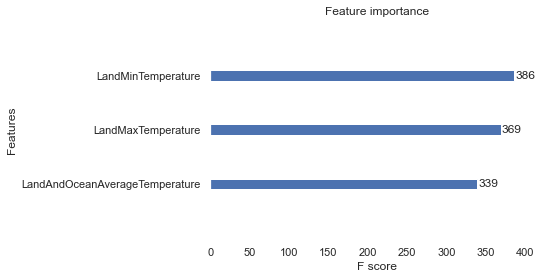

In [49]:
#Ranking the features'importance 
xgboost.plot_importance(model_fit)

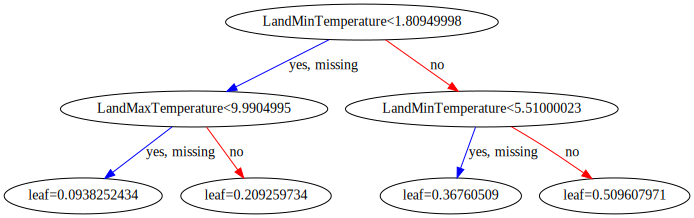

In [50]:
#Plotting of the tree that would predict with the highest accuracy 
#The most discriminatory variable, LandMinTemperature is naturally at the top of the tree
xgboost.to_graphviz(model_fit,size="5")

### Adding New variables and decreasing of the MED

In [51]:
# Adding the CO2 level as a a feature
CO2=pd.read_csv("input/co2-mm-mlo.csv",sep=",")
CO2

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03,1958.208,315.71,315.71,314.62,-1
1,1958-04,1958.292,317.45,317.45,315.29,-1
2,1958-05,1958.375,317.50,317.50,314.71,-1
3,1958-06,1958.458,-99.99,317.10,314.85,-1
4,1958-07,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
699,2016-06,2016.458,406.81,406.81,404.47,26
700,2016-07,2016.542,404.39,404.39,404.00,28
701,2016-08,2016.625,402.25,402.25,404.09,23
702,2016-09,2016.708,401.03,401.03,404.46,24


In [52]:
# We drop the year 2016 since we don't have the temperatures of 2016
CO2 = CO2.drop(CO2.index[-10:])
CO2["Date"]=CO2["Date"]+"-01"
CO2["Date"]=pd.to_datetime(CO2["Date"])
CO2=CO2.drop(["Decimal Date","Interpolated","Trend","Number of Days"],axis=1)

# We merge the temperatures data with the CO2 data and we keep 
#only the months where we have the average CO2 levels
temperatures=pd.merge(left=global_temperatures,right=CO2, left_on='dt', right_on='Date', how='outer')
temp=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)<1980])
temp=temp.dropna()
temp.head(5)

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,Date,Average
1298,1958-03-01,5.453,11.321,-0.549,14.547,1958-03-01,315.71
1299,1958-04-01,8.520,14.392,2.570,15.359,1958-04-01,317.45
1300,1958-05-01,11.519,17.355,5.625,16.180,1958-05-01,317.50
1301,1958-06-01,13.187,19.028,7.427,16.619,1958-06-01,-99.99
1302,1958-07-01,14.438,20.121,8.839,17.039,1958-07-01,315.86


In [53]:
temp

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,Date,Average
1298,1958-03-01,5.453,11.321,-0.549,14.547,1958-03-01,315.71
1299,1958-04-01,8.520,14.392,2.570,15.359,1958-04-01,317.45
1300,1958-05-01,11.519,17.355,5.625,16.180,1958-05-01,317.50
1301,1958-06-01,13.187,19.028,7.427,16.619,1958-06-01,-99.99
1302,1958-07-01,14.438,20.121,8.839,17.039,1958-07-01,315.86
...,...,...,...,...,...,...,...
1555,1979-08-01,13.833,19.623,8.266,16.978,1979-08-01,335.56
1556,1979-09-01,12.247,18.059,6.714,16.450,1979-09-01,333.93
1557,1979-10-01,9.586,15.354,4.054,15.557,1979-10-01,334.12
1558,1979-11-01,6.286,11.807,0.905,14.609,1979-11-01,335.26


### <center> Predictive Data Modelling

### Random Forest

In [54]:
#Sets

# Train
train_df_copy=pd.DataFrame.copy(temp)
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)

X_train = train_df.drop(["LandAverageTemperature","dt","Date"], axis = 1)
y_train = train_df['LandAverageTemperature']

# Test
test_df_copy=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)

X_test = test_df.drop(["LandAverageTemperature","dt","Date"],axis = 1 )
y_test = test_df['LandAverageTemperature']

In [55]:
#Definition of the Minimization Function

def MED_RF(n,maxi,
       X_train, y_train, X_test,y_test,
       MED_limit):
    
#Note that there is no learning_rate for the random forest regressor
    
    '''
    n         : n_estimators  -> Number of boosted trees to fit
    maxi      : max_depth     -> Maximum tree depth for base learners
    ...
    MED_limit : -> threshold for minimum MED required
    '''
    
    forest = RandomForestRegressor(n_estimators=n,max_depth = maxi)
    model_fit = forest.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()
    
    if MED<MED_limit:
        return MED, n, maxi
    else:
        return 0

In [56]:
#Hyperparameters

max_depth = [8+i for i in range(7)]
n_estimators = [i+1 for i in range(100)]
MED_limit = 0.2
l=[]

In [57]:
#### Minimization (Very long loop depending on parameters) ####

for n in n_estimators:
    for maxi in max_depth:
        a = MED_RF(n,maxi,X_train,y_train,X_test,y_test,MED_limit)
        if a != 0:
            l.append(a)
            l.sort()

l[:5] # 5 Best MED Results

[(0.1317675367362723, 10, 10),
 (0.13416663737139387, 33, 12),
 (0.1342557838912828, 14, 12),
 (0.13639303944315542, 25, 14),
 (0.13668007409867025, 82, 8)]

In [58]:
# GridSearch (very long)

'''clf = GridSearchCV(forest,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_'''

'''
output:
(0.9995155048564097, {'max_depth': 14, 'n_estimators': 36})'''

"\noutput:\n(0.9995155048564097, {'max_depth': 14, 'n_estimators': 36})"

### Random Forest Regressor

In [59]:
#Random Forest (GridSearch MED Test)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max) and the CO2 level of the current year
for j in (train_df.index):
    for column in train_df.columns[1:-2]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]
forest = RandomForestRegressor(max_depth=10,n_estimators=462)
train_df=train_df.drop(['dt',"Date"],axis=1)
forest = forest.fit(train_df.drop(["LandAverageTemperature"],axis=1),train_df["LandAverageTemperature"])

for j in (test_df.index):
    for column in test_df.columns[1:-2]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]
test_df=test_df.drop(['dt',"Date"],axis=1)
y_pred = forest.predict(test_df.drop(["LandAverageTemperature"],axis=1))

# Distance computing
y_test = test_df['LandAverageTemperature']
test_df['Predicted_temp']=y_pred
MED=abs(y_test-y_pred).mean()
print('Mean Euclidean Distance:', MED)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Euclidean Distance: 0.15044407050112815
Mean Absolute Error: 0.15044407050112815
Mean Squared Error: 0.047392370367633975
Root Mean Squared Error: 0.2176978878345722
R2 Square: 0.9972276498999672


### XGBoost

In [60]:
#Sets

# Train
train_df_copy_2=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# Test
test_df_copy_2=pd.DataFrame.copy(temperatures[temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)


In [61]:
#XGBoost (GridSearch MED Test)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min, max) and the CO2 level of the current year

for j in (train_df_2.index):
    for column in train_df_2.columns[1:-2]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
xgbr = XGBRegressor()
xgbr = xgbr.fit(train_df_2.drop(["LandAverageTemperature","dt","Date"],axis=1),train_df_2["LandAverageTemperature"])


for j in (test_df_2.index):
    for column in test_df_2.columns[1:-2]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
y_test = test_df_2["LandAverageTemperature"]
y_pred = xgbr.predict(test_df_2.drop(["LandAverageTemperature","dt","Date"],axis=1))

# Distance computing
test_df_2['Predicted_temp']=y_pred

MED=abs(y_test-y_pred).mean()
print('Mean Euclidean Distance:', MED)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Euclidean Distance: 0.29600491955661995
Mean Absolute Error: 0.2960049195566199
Mean Squared Error: 0.15827613109816896
Root Mean Squared Error: 0.39783932824466833
R2 Square: 0.9907411922113417


In [62]:
#Hyperparameters

max_depth = [2+i for i in range(4)]
learning_rate = [0.01+0.01*i for i in range(5)]
n_estimators = [450+i*10 for i in range(10)]
MED_limit = 2
l=[]

In [63]:
#### Minimization (Very long loop depending on parameters) ####

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5] # 5 Best MED Results

[(1.538265638484202, 540, 0.04, 4),
 (1.5388368839210809, 530, 0.04, 4),
 (1.538874825665679, 490, 0.02, 4),
 (1.5389709846381516, 500, 0.02, 4),
 (1.5391198457863928, 510, 0.02, 4)]

In [64]:
# GridSearch (very long)

'''clf = GridSearchCV(xgbr,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_'''
'''
Output:
(0.9333152336083268,
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 520})'''

"\nOutput:\n(0.9333152336083268,\n {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 520})"

## Clustering 

### Preparing the DataFrame

In [65]:
country_temps = pd.read_csv("input/GlobalLandTemperaturesByCountry.csv", sep=',')
country_temps.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [66]:
#Drop Uncertainty for the clustering

country_temps = country_temps.drop("AverageTemperatureUncertainty", axis = 1)

# Delete all empty lines, change time, and put time as Index

country_temps['dt'] = pd.to_datetime(country_temps['dt'])

country_temps.tail()

#Setting the Countries as Index, time as Columns and Average Temperature as the main Data
pivot = country_temps.pivot("Country","dt","AverageTemperature")

pivot = pivot.drop(pivot.columns[[i for i in range(1274)]+[3238]], axis = 1)

"""
    Data before 1850 is deleted because 
    
    *30%  of Database is NaN if dt starts at 1773
    *18%  of Database is NaN if dt starts at 1800
    *5.2% of Database is NaN if dt starts at 1850
    
    Numbers obtained doing :
        -> np.count_nonzero(~np.isnan(pivot))
    
    Plus, the last month (9/2013) doesn't have any data
    
"""
#Getting rid of all countries with no data
pivot = pivot.dropna(how='all')

#Only one country eliminated
pivot.head(5)

dt,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.288,3.143,8.583,13.456,18.717,23.859,27.194,24.843,19.792,12.560,...,8.700,2.907,2.241,4.253,8.460,14.845,21.355,26.879,28.205,26.031
Africa,19.764,22.393,23.672,24.197,24.302,24.980,25.089,25.254,24.919,23.831,...,24.607,21.983,22.138,23.533,25.717,25.520,26.671,26.324,25.856,25.911
Albania,-0.160,4.270,4.868,10.700,14.758,20.138,21.840,22.736,16.512,12.763,...,11.269,3.820,4.412,5.769,8.423,13.538,18.355,21.070,23.591,24.793
Algeria,10.604,14.819,18.362,22.717,26.391,31.143,33.656,33.000,28.880,22.708,...,20.031,13.638,12.781,14.211,21.027,24.242,28.482,32.288,34.707,33.234
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.963,27.316,27.241,27.793,27.683,27.824,28.045,27.650,26.902,27.000


### Country Clustering

##### Adding Median to missing values

In [67]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="median")
#Imputer changes type of DataFrame. 

trans_pivot = imp.fit_transform(pivot)
nonan_pivot = pd.DataFrame(trans_pivot)

nonan_pivot.columns = pivot.columns
nonan_pivot.index = pivot.index

nonan_pivot.tail()

print(np.count_nonzero(~np.isnan(nonan_pivot)))

#No missing data, and let's now call the DataFrame : clusterdf

clusterdf = nonan_pivot
clusterdf.head(5)

475288


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


dt,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-1.288,3.143,8.583,13.456,18.717,23.859,27.194,24.843,19.792,12.560,...,8.700,2.907,2.241,4.253,8.460,14.845,21.355,26.879,28.205,26.031
Africa,19.764,22.393,23.672,24.197,24.302,24.980,25.089,25.254,24.919,23.831,...,24.607,21.983,22.138,23.533,25.717,25.520,26.671,26.324,25.856,25.911
Albania,-0.160,4.270,4.868,10.700,14.758,20.138,21.840,22.736,16.512,12.763,...,11.269,3.820,4.412,5.769,8.423,13.538,18.355,21.070,23.591,24.793
Algeria,10.604,14.819,18.362,22.717,26.391,31.143,33.656,33.000,28.880,22.708,...,20.031,13.638,12.781,14.211,21.027,24.242,28.482,32.288,34.707,33.234
American Samoa,13.960,15.370,18.443,20.359,21.059,23.902,24.512,24.570,23.448,22.030,...,27.963,27.316,27.241,27.793,27.683,27.824,28.045,27.650,26.902,27.000


#### Clustering Code

In [68]:
def Clustering(df,x,y,orientation,size):
    
    """
    
    df          : DataFrame
    x,y         : plt dimensions
    orientation : top, bottom, right or left
    size        : leaf_font_size
    
    """
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        distance_sort = True,
        show_leaf_counts=False,
        leaf_font_size = size,
        ax=ax,
        orientation = str(orientation)
    )

def Clustering_truncated(df,x,y,orientation,p,size):
    
    """
    
    df          : DataFrame
    x,y         : plt dimensions
    orientation : top, bottom, right or left
    p           : Only the last p merged clusters are shown
    size        : leaf_font_size
    
    """
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])
    
    fig = plt.figure( figsize=(x,y) )
    ax = fig.add_subplot(1,1,1) 
    r = dendrogram(
        dendro,
        color_threshold=None,
        labels=df.index,
        show_leaf_counts=False,
        truncate_mode = 'lastp',  # show only the last p merged clusters
        p = p,  # show only the last p merged clusters
        leaf_font_size = size,
        show_contracted = True,  # to get a distribution impression in truncated branches
        ax=ax,
        orientation = str(orientation)
        
    )
    return r["ivl"]

#### $1^{st}$ Clustering : All Countries

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 0, 'Distance')

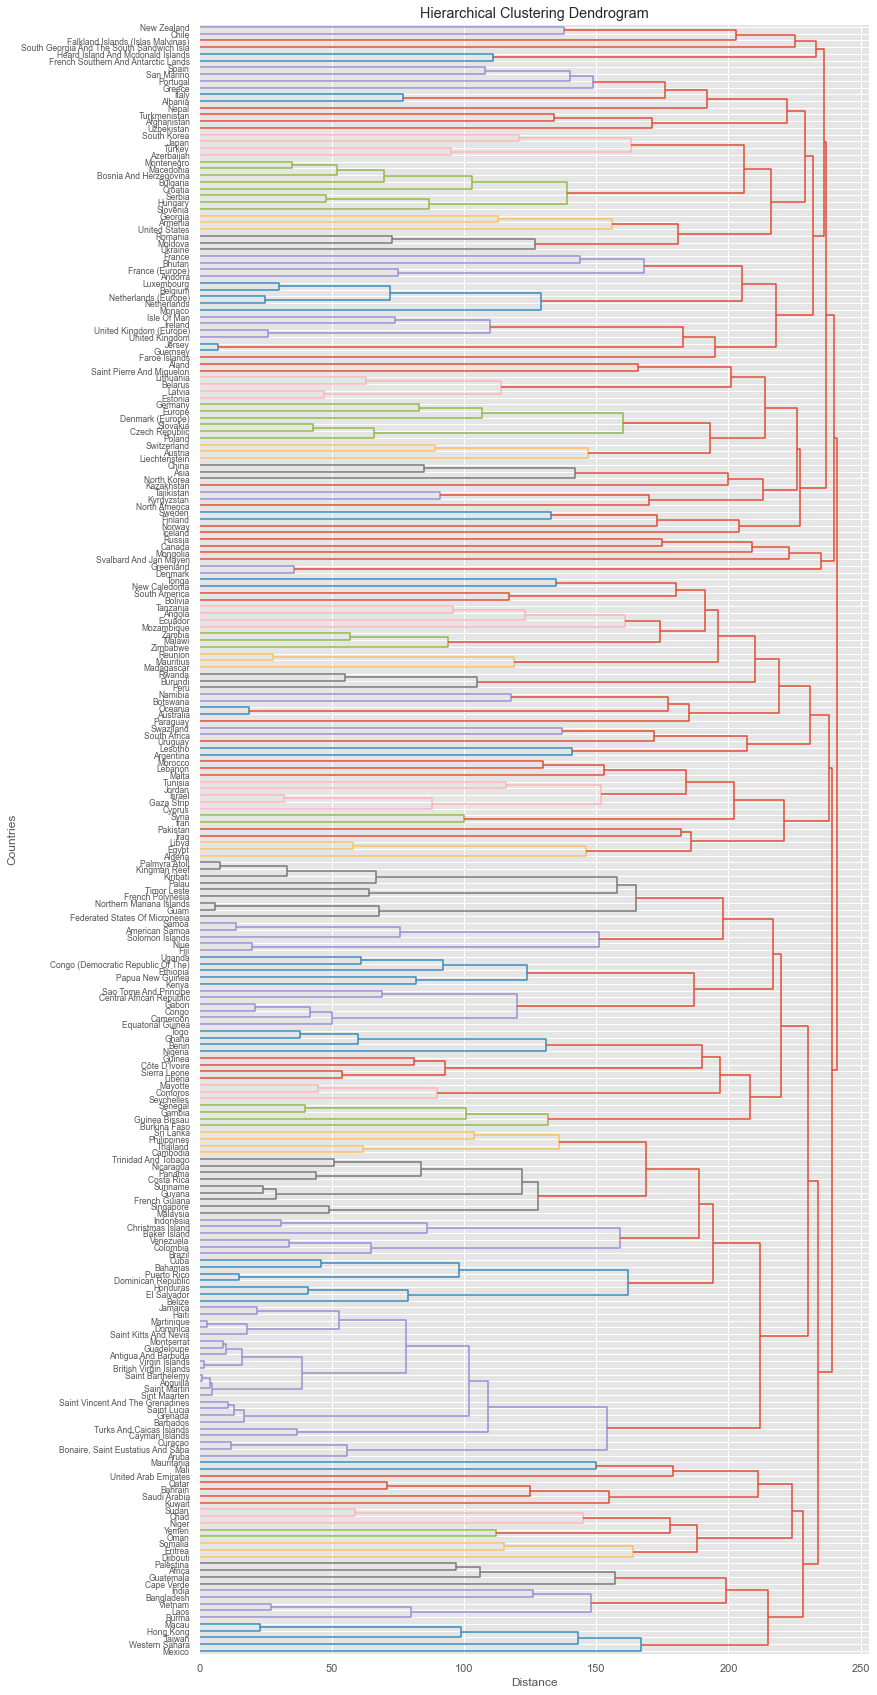

In [69]:
Clustering(clusterdf,12,30,"right",8.5)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Countries')
plt.xlabel('Distance')

#### 2nd Clustering

G:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Countries')

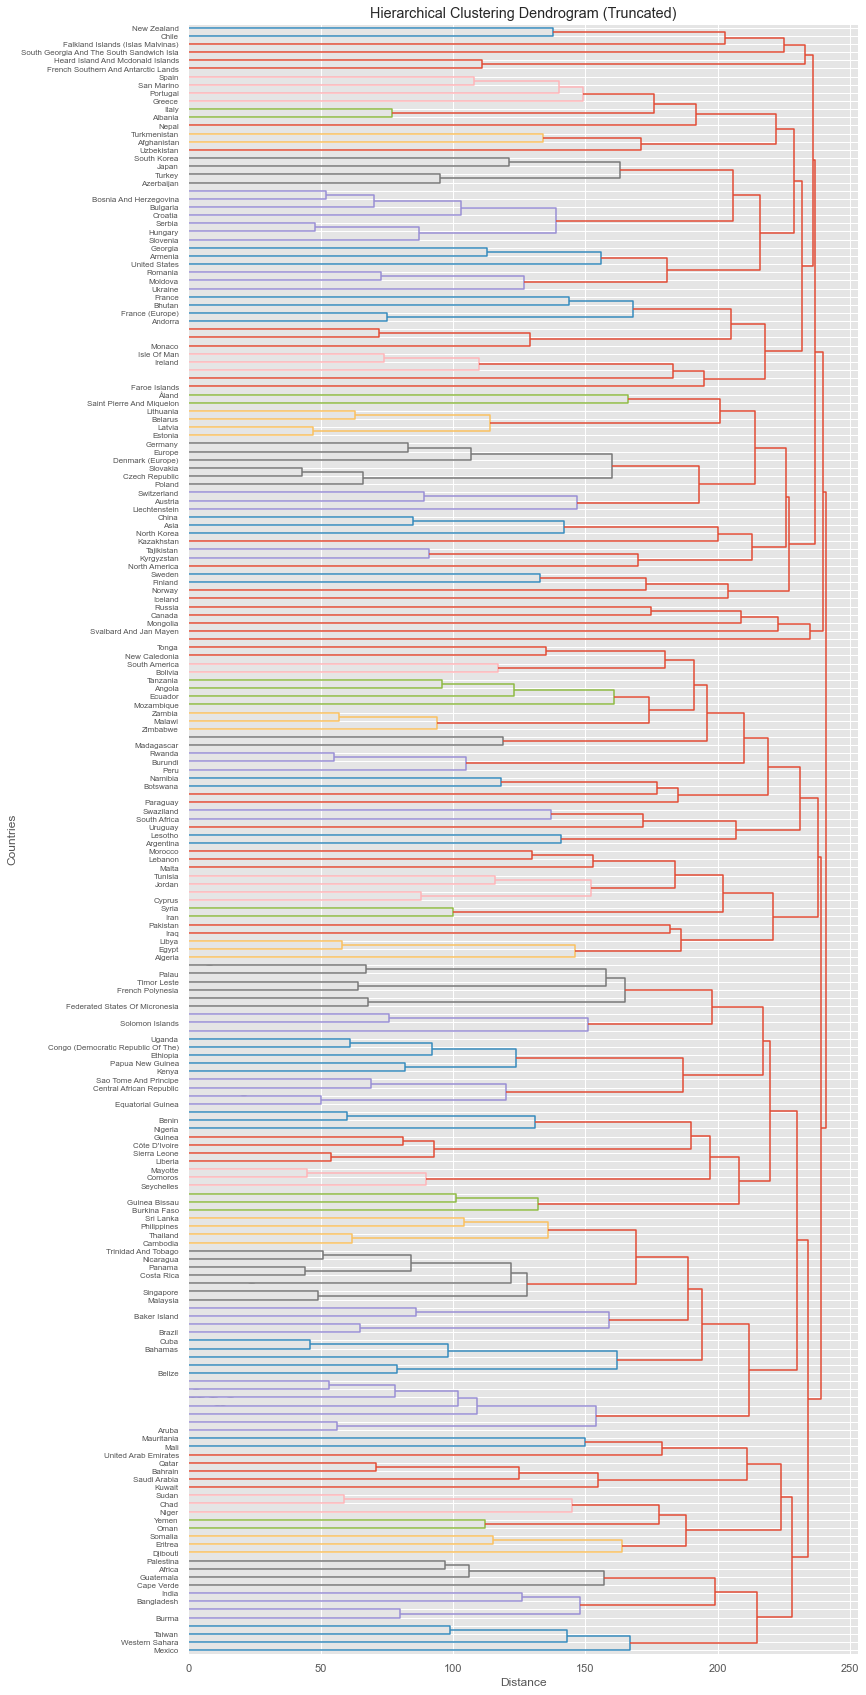

In [70]:
Cluster_70 = Clustering_truncated(clusterdf,12,30,"right",200,8)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Distance')
plt.ylabel('Countries')

In [71]:
Cluster_70[:15]

['Mexico',
 'Western Sahara',
 'Taiwan',
 '',
 'Burma',
 '',
 'Bangladesh',
 'India',
 'Cape Verde',
 'Guatemala',
 'Africa',
 'Palestina',
 'Djibouti',
 'Eritrea',
 'Somalia']

In [72]:
def delete_symbol(l,sym):
    for i in range(l.count(sym)):
        l.remove(sym)
    return l, len(l)

In [73]:
cntry_to_keep = delete_symbol(Cluster_70,'')

In [74]:
clusterdf_new = clusterdf.drop(cntry_to_keep[0], axis = 0)
clusterdf_new.head()

dt,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,...,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01
Country,,,,,,,,,,,,,,,,,,,,,
American Samoa,13.960,15.370,18.443,20.359,21.059,23.902,24.512,24.570,23.448,22.030,...,27.963,27.316,27.241,27.793,27.683,27.824,28.045,27.650,26.902,27.000
Anguilla,24.075,24.985,25.064,24.859,25.734,27.073,27.922,27.949,27.696,26.701,...,28.203,26.476,25.919,25.899,26.187,26.679,27.667,28.414,28.904,29.235
Antigua And Barbuda,23.930,24.845,24.984,24.879,25.711,26.988,27.714,27.672,27.346,26.351,...,27.890,26.329,25.787,25.802,26.089,26.601,27.706,28.322,28.712,28.978
Australia,13.960,15.370,18.443,20.359,21.059,23.902,24.512,24.570,23.448,22.030,...,26.935,28.417,29.861,28.311,26.590,23.305,19.377,16.018,15.933,17.748
Barbados,24.249,25.140,25.271,25.304,25.918,27.006,27.312,27.109,26.968,26.298,...,27.922,26.744,26.088,26.182,26.504,26.806,27.849,28.020,28.284,28.276


G:\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Countries')

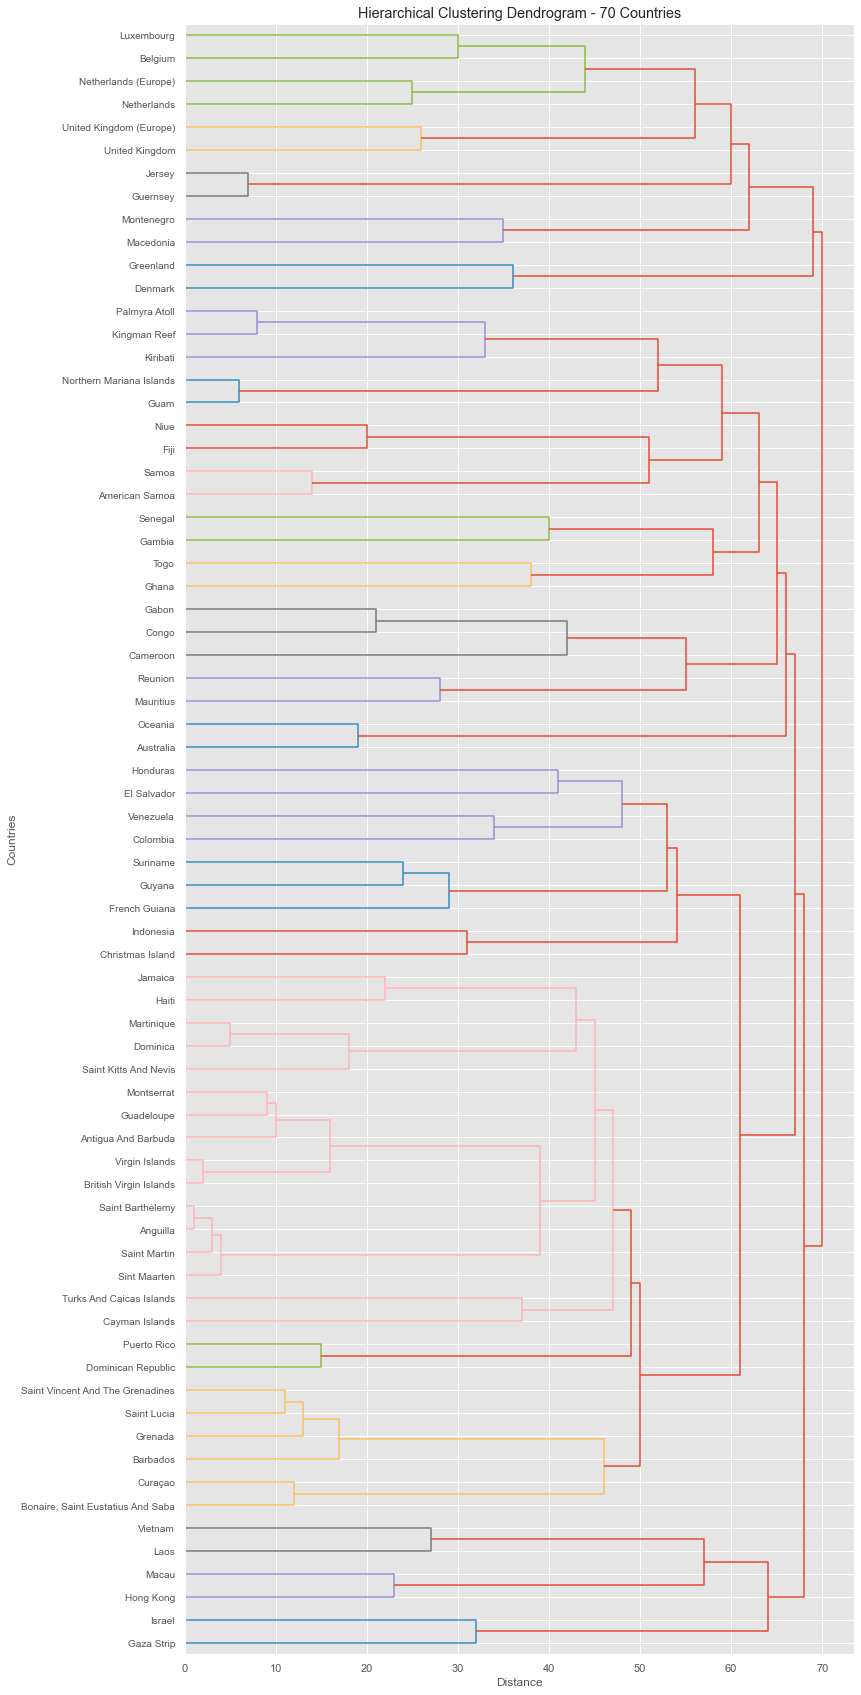

In [75]:
Clustering(clusterdf_new,12,30,"right",10)
plt.title('Hierarchical Clustering Dendrogram - 70 Countries')
plt.xlabel('Distance')
plt.ylabel('Countries')

## <center> Data Visualization

### Conclusion on multiple cities

In [76]:
def city_analysis(df, city):
    #Building of a new Dataframe adapted to the map
    print("\n\n\nCity = ", city, "\n\n\n")
    import math
    from collections import OrderedDict
    import pandas as pd
    import numpy as np
    from bokeh.io import output_notebook, show
    from bokeh.plotting import (ColumnDataSource, figure)
    from bokeh.models import HoverTool
    df=df[df.City == city]
    df['dt2'] = df['dt'].apply(lambda x: x[:4])
    df['dt2'] = pd.to_numeric(df['dt2'])
    df.drop(df[df.dt2 < 1800].index, inplace=True)
    df=df.drop(df.columns[2:6], axis=1)
    df=df.dropna()
    df_city = copy.deepcopy(df)
    
    date=df_city['dt'].apply(lambda x: x[:4])
    years = np.unique(date)
    mean_temps_Paris=[]
    
    for y in years:  
        mean_temps_Paris.append(df_city[y==date]['AverageTemperature'].mean())
    len_df = len(df_city) - 1
    jan=[]
    for i in range(0,len_df,12):
            jan.append(df_city.iloc[i]['AverageTemperature'])  
    feb=[]
    for i in range(1,len_df,12):
            feb.append(df_city.iloc[i]['AverageTemperature'])
    mar=[]
    for i in range(2,len_df,12):
            mar.append(df_city.iloc[i]['AverageTemperature'])
    apr=[]
    for i in range(3,len_df,12):
            apr.append(df_city.iloc[i]['AverageTemperature'])
    may=[]
    for i in range(4,len_df,12):
            may.append(df_city.iloc[i]['AverageTemperature'])
    jun=[]
    for i in range(5,len_df,12):
            jun.append(df_city.iloc[i]['AverageTemperature'])
    jul=[]
    for i in range(6,len_df,12):
            jul.append(df_city.iloc[i]['AverageTemperature'])
    aug=[]
    for i in range(7,len_df,12):
            aug.append(df_city.iloc[i]['AverageTemperature'])
    sep=[]
    for i in range(8,len_df,12):
            sep.append(df_city.iloc[i]['AverageTemperature'])
    octb=[]
    for i in range(9,len_df,12):
            octb.append(df_city.iloc[i]['AverageTemperature'])
    nov=[]
    for i in range(10,len_df,12):
            nov.append(df_city.iloc[i]['AverageTemperature'])
    dec=[]
    for i in range(11,len_df,12):
            dec.append(df_city.iloc[i]['AverageTemperature'])
    
    #New Dataframe
    
    df_city=pd.DataFrame({'Annual':pd.Series(mean_temps_Paris),'Year':years,'Jan':pd.Series(jan),
                        'Feb':pd.Series(feb),'Mar':pd.Series(mar),'Apr':pd.Series(apr),'May':pd.Series(may),
                        'Jun':pd.Series(jun),'Jul':pd.Series(jul),'Aug':pd.Series(aug),'Sep':pd.Series(sep),'Oct':pd.Series(octb),
                        'Nov':pd.Series(nov),'Dec':pd.Series(dec)})
    
    df_city=df_city[['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual']]
    df_city=df_city.dropna()
    print(df_city)
    min_temp = df_city[['Jan','Feb','Mar','Apr','May','Jun',
                        'Jul','Aug','Sep','Oct','Nov','Dec']].stack().min()
    max_temp = df_city[['Jan','Feb','Mar','Apr','May','Jun',
                        'Jul','Aug','Sep','Oct','Nov','Dec']].stack().max()
    print("min_temp = ", min_temp, "\nmax_temp = ", max_temp)
    
    #Interactive map with monthly average temperatures in Paris since 1900
    
    output_notebook()
    df_city.reset_index(inplace=True)
    # Read in the data with pandas. Convert the year column to string
    df_city['Year'] = [str(x) for x in df_city['Year']]
    years = list(df_city['Year'])
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    df_city = df_city.set_index('Year')
    # this is the colormap from the original plot
    
    colors = ["#75968f", "#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
            "#ddb7b1", "#cc7878", "#933b41", "#550b1d","#75968f","#75968f"]
    
    # Set up the data for plotting. We will need to have values for every
    # pair of year/month names. Map the Temperature to a color.
    def mapping_to_colors2(x):
        indx = abs(int(math.ceil((max_temp - min_temp)/8)))
        c = 0
        for i in range(int(min_temp), int(max_temp), int(indx)):
            c = c + 1
            if(x<i):
                return c
        return 8
    def mapping_to_colors(x):
        if x<=0:
            return 1
        elif x>=0 and x<4:
            return 2
        elif x>=4 and x<8:
            return 3
        elif x>=8 and x<12:
            return 4
        elif x>=12 and x<14:
            return 5
        elif x>=14 and x<19:
            return 6
        elif x>=19 and x<22:
            return 7
        else:
            return 8
    
    month = []
    year = []
    color = []
    Temperature = []
    for y in years:
        for m in months:
            month.append(m)
            year.append(y)
            Monthly_Temperature = df_city[m][y]
            Temperature.append(Monthly_Temperature)
            color.append(colors[mapping_to_colors2(Monthly_Temperature)])
    
    source = ColumnDataSource(
        data=dict(month=month, year=year, color=color, Temperature=Temperature)
    )
    
    TOOLS = "hover,save,pan,box_zoom,wheel_zoom"
    
    #Display parameters
    p = figure(title=city + " Temperature (1900 - 2012)",
        x_range=years, y_range=list(reversed(months)),
        x_axis_location="above", plot_width=3000, plot_height=500,
        toolbar_location="below", tools=TOOLS,)
    
    p.rect("year", "month", 1, 1, source=source,
        color="color", line_color=None)
    
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "5pt"
    p.axis.major_label_standoff = 0
    p.xaxis.major_label_orientation = np.pi/3
    
    #Hovers parameters
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = OrderedDict([
        ('date', '@month @year'),
        ('Temperature', '@Temperature'),])
    
    show(p)

In [77]:
df=pd.read_csv('input/GlobalLandTemperaturesByMajorCity.csv')
print(df['City'].unique())
print("\n\n\n")


['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [78]:
city = 'Hyderabad'
city_analysis(df, city)




City =  Hyderabad 



     Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    1800  22.979  25.527  28.376  32.456  32.221  30.372  26.605  26.536   
1    1801  23.231  24.779  30.266  29.925  27.233  27.055  26.497  25.537   
2    1802  30.112  31.989  32.084  31.613  28.202  27.003  28.193  26.075   
3    1803  28.727  32.021  32.715  30.881  28.074  28.169  27.816  25.927   
4    1804  28.662  32.941  33.494  31.384  29.083  27.167  27.564  25.834   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
200  2007  33.765  30.131  28.513  26.843  26.898  26.534  24.781  23.396   
201  2008  33.516  31.014  28.266  28.008  27.699  26.658  24.923  23.173   
202  2009  33.482  30.639  26.996  27.159  26.905  26.418  25.167  22.234   
203  2010  33.142  30.149  27.735  27.068  27.610  27.192  24.861  23.613   
204  2011  34.331  31.775  27.925  27.504  27.679  26.236  24.641  24.006   

        Sep     Oct     Nov     Dec     Annual  
0

Loading BokehJS ...

In [79]:
city = 'New Delhi'
city_analysis(df, city)




City =  New Delhi 



     Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    1800  14.525  17.781  22.055  29.968  32.960  33.978  30.926  29.686   
1    1801  14.932  16.778  24.344  33.279  31.788  29.407  28.708  25.967   
2    1802  24.033  29.228  32.784  35.057  32.112  30.222  29.480  26.544   
3    1803  22.459  29.908  34.062  34.291  32.261  31.455  29.740  26.245   
4    1804  22.327  30.744  34.307  34.491  32.972  30.453  29.538  26.056   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
190  2007  21.927  15.925  14.534  16.809  25.979  29.609  32.313  31.151   
191  2008  21.769  17.845  16.096  19.479  24.655  30.182  34.067  35.543   
192  2009  21.214  16.871  14.014  19.178  26.953  32.809  35.610  35.165   
193  2010  21.757  15.393  13.376  18.136  23.864  28.956  34.298  32.967   
194  2011  22.484  16.203  13.701  17.088  23.686  29.341  34.448  36.339   

        Sep     Oct     Nov     Dec     Annual  
0

Loading BokehJS ...

In [80]:
city = 'Bombay'
city_analysis(df, city)




City =  Bombay 



     Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    1800  24.394  24.477  25.033  28.385  28.427  28.650  26.586  26.526   
1    1801  24.724  23.601  27.124  28.076  27.332  26.643  26.777  27.569   
2    1802  26.891  27.781  28.269  29.809  27.975  27.028  28.007  28.127   
3    1803  25.411  28.140  29.227  29.060  27.987  28.228  27.951  27.903   
4    1804  25.312  29.017  29.737  29.411  28.846  27.226  27.725  27.761   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
200  2007  29.540  28.223  27.554  26.831  27.193  28.655  28.512  27.435   
201  2008  29.735  29.548  27.385  27.852  28.173  28.396  28.324  27.043   
202  2009  30.682  28.881  27.364  27.279  27.587  28.774  28.883  25.460   
203  2010  29.546  28.394  27.133  27.122  27.390  28.864  29.040  26.850   
204  2011  29.235  28.847  27.941  27.405  27.491  28.689  27.540  26.828   

        Sep     Oct     Nov     Dec     Annual  
0   

Loading BokehJS ...

In [81]:
city = 'London'
city_analysis(df, city)




City =  London 



     Year    Jan    Feb    Mar     Apr     May     Jun     Jul     Aug  \
0    1800  2.624  1.865  3.617   9.801  13.087  13.207  17.236  17.728   
1    1801  4.326  3.735  6.898   8.096  12.267  14.632  16.089  17.456   
2    1802  0.956  3.852  5.588   8.953  11.122  14.608  14.800  18.014   
3    1803  0.454  2.082  5.585   9.182  10.266  13.944  17.900  16.591   
4    1804  5.737  2.690  4.552   6.462  13.529  16.039  15.959  15.741   
..    ...    ...    ...    ...     ...     ...     ...     ...     ...   
208  2008  6.721  5.386  6.358   8.275  13.860  15.243  17.464  17.070   
209  2009  2.769  4.088  7.019  10.268  13.115  15.585  17.114  17.945   
210  2010  1.381  2.812  6.422   9.292  11.328  16.130  18.805  16.242   
211  2011  4.100  6.488  6.862  12.071  13.290  15.178  15.992  16.484   
212  2012  5.313  3.723  7.964   7.496  12.341  13.477  16.487  17.697   

        Sep     Oct    Nov    Dec     Annual  
0    14.427   9.107  5.842  3.266   9.3172

Loading BokehJS ...

In [82]:
city = 'Tokyo'
city_analysis(df, city)




City =  Tokyo 



     Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    1845   2.377   1.312   5.276  10.387  14.923  19.497  23.979  24.109   
1    1846   1.474   1.824   5.852  10.111  14.366  19.724  23.845  24.931   
2    1847   1.730   1.895   4.195  10.555  14.876  19.081  23.574  24.664   
3    1848  -0.108   2.401   5.021  10.498  15.242  19.392  23.898  24.014   
4    1849   1.647   2.797   6.124   9.667  14.536  19.233  23.032  24.299   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
163  2008  16.164  19.392  24.848  24.506  21.323  15.746   9.247   5.430   
164  2009  17.633  20.318  23.875  24.193  20.272  15.161   9.835   4.895   
165  2010  16.337  21.521  25.558  27.295  22.414  15.881   9.515   5.719   
166  2011  16.147  21.085  25.288  25.202  22.199  15.488  10.803   3.250   
167  2012  16.670  19.359  24.444  26.681  23.275  15.722   8.718   2.961   

        Sep     Oct    Nov     Dec     Annual  
0    1

Loading BokehJS ...

In [83]:
city = 'Calcutta'
city_analysis(df, city)




City =  Calcutta 



     Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0    1800  18.694  22.134  25.840  30.722  30.266  30.189  28.565  28.806   
1    1801  19.073  21.177  28.057  29.535  29.385  28.670  28.414  26.854   
2    1802  27.774  30.032  30.096  31.297  29.825  29.329  29.350  27.424   
3    1803  26.234  30.596  31.259  30.537  29.924  30.551  29.496  27.152   
4    1804  26.114  31.447  31.599  30.791  30.689  29.549  29.286  26.980   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  2007  31.134  29.111  28.852  29.284  29.087  27.422  24.227  20.863   
203  2008  30.585  31.665  29.575  29.533  29.626  27.273  24.281  19.817   
204  2009  31.308  31.075  29.979  30.226  29.536  28.071  25.437  19.603   
205  2010  30.395  29.873  29.473  28.976  29.092  28.097  24.110  19.767   
206  2011  32.232  31.959  29.680  29.762  29.653  27.427  23.487  19.621   

        Sep     Oct     Nov     Dec     Annual  
0 

Loading BokehJS ...

### Analyzing CO2 Emission, Global Temprature Rise and Sea Level Rise

In [84]:
temp=pd.read_csv('input/GlobalTemperatures.csv',parse_dates=['dt'])
temp.rename(columns = {'dt':'Time'},inplace=True)
temp.head()

FileNotFoundError: [Errno 2] No such file or directory: 'GlobalTemperatures.csv'

In [ ]:
gmsl=pd.read_csv('CSIRO_gmsl.csv',parse_dates=['Time'])
gmsl.head()

In [ ]:
co2 = pd.read_csv('global_co2.csv',parse_dates=['Year'])
co2.rename(columns = {'Year':'Time'},inplace=True)
co2.head()

In [ ]:
df_merge = pd.merge_asof(temp, gmsl,on='Time')
climate = pd.merge_asof(df_merge, co2,on='Time')
climate.index = climate["Time"] 
climate= climate.drop(columns=['Time','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','GMSL uncertainty (mm)',
                               'LandAndOceanAverageTemperatureUncertainty','LandAverageTemperatureUncertainty'])
climate.rename(columns = {'LandAverageTemperature':'LandAvgTemp', 'LandMaxTemperature':'LandMaxTemp', 
                 'LandMinTemperature':'LandMinTemp', 'LandAndOceanAverageTemperature':'Land&OceanAvgTemp','GMSL (mm)':'gmsl(mm)',
            'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)':'totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)',
             'Carbon emissions from gas fuel consumption':'carbonEmissions-GasFuelConsumption','Carbon emissions from liquid fuel consumption':
              'carbonEmissions-LiquidFuelConsumption', 'Carbon emissions from solid fuel consumption':'carbonEmissions-SolidFuelConsumption',
              'Carbon emissions from cement production':'carbonEmissions-cementProduction', 'Carbon emissions from gas flaring':'carbonEmissions-gasFlaring',
              'Per capita carbon emissions (metric tons of carbon; after 1949 only)': 'perCapitaCarbon-emissions(MMT)'}, inplace = True) 
climate.head()

In [ ]:
climate.info()

In [ ]:
climate.describe().T

In [ ]:
Avg= climate['LandAvgTemp'].mean()
print('Mean of Land Average Temperature in celsius:' ,round(Avg, 2))

per= climate['perCapitaCarbon-emissions(MMT)'].mean()
print('Mean of Per capita carbon emissions in million metric tons :' ,round(per, 2))

w= climate['LandMaxTemp'].max()
print('Maximum average temprature on land in celsius:', w)

i= climate['LandMaxTemp'].min()
print('Minimum average temprature on land in celsius:', i)

In [ ]:
cli_copy= climate.copy()
duplicate= cli_copy.resample('Y').mean() 
# Analysing contributions of  carbon emsissions by sectors
x= duplicate['totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)'].sum()
y= duplicate['carbonEmissions-GasFuelConsumption'].sum()
z= duplicate['carbonEmissions-LiquidFuelConsumption'].sum()
w= duplicate['carbonEmissions-SolidFuelConsumption'].sum()
v= duplicate['carbonEmissions-cementProduction'].sum()
q= duplicate['carbonEmissions-gasFlaring'].sum()
u= duplicate['perCapitaCarbon-emissions(MMT)'].sum()

print('Total cabon emissions by Fossil fuels and cement production:', x, '(mmt)')
print('Carbon Emissions from Gas Fuel Consumption:', y, '(mmt)')
print('Carbon Emissions from Liquid Fuel Consumption:', z, '(mmt)')
print('Carbon Emissions from Solid Fuel Consumption:', w, '(mmt)')
print('Carbon Emissions from cement Production:', v, '(mmt)')
print('Carbon Emissions from gas Flaring:', q, '(mmt)')
print('Total Per Capita Carbon-emissions:', u, '(mmt)')
print()
print('Burning of Fossil fuels and cement production emits more CO2 than any other source into the atmosphere:',
      max(x,y,z,w,v,q,u), '(mmt)')

### Analysis
- Fossil fuels and cement production emits more CO2 than any other sector and thus can be the main cause for change of global climatic conditions.
- Global per capita carbon emissions are lowest in number. This means that each person contributes much less to CO2 emissions when we consider other sectors.

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
index= duplicate.index.values
wide_df = pd.DataFrame(duplicate, index, ['totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)',
       'carbonEmissions-GasFuelConsumption','carbonEmissions-LiquidFuelConsumption','carbonEmissions-SolidFuelConsumption',
       'carbonEmissions-cementProduction', 'carbonEmissions-gasFlaring','perCapitaCarbon-emissions(MMT)'])
ax.set_ylabel('Carbon emissions(MMT)')
ax.set_title('Global CO2 emissions (million metric tons)',fontsize=20)
sns.scatterplot(data=wide_df,ax=ax)

### Analysis
- global CO2 emissions are on the rise.
- CO2 emissions are at record speed over past decades.
- The amount of carbon dioxide in the atmosphere has increased since the Industrial Revolution.
- The largest contributer of CO2 emissions on earth's surface are Fossil fuels.

### Growth of global Fossil fuels consumption

In [ ]:
new1= climate[['totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)']]
new1_df = pd.pivot_table(new1, index=new1.index.year)
new1_df.head()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(new1_df,cmap="BuPu")

We can overview the rate at which fossil fuels consumption has grown globally which emits large amount of CO2 into the atmosphere.

There seems to be steady growth in consumption of fossil fuels from 1960 to 2015.

### Global mean sea levels over years

In [ ]:
df=climate[['gmsl(mm)']]
df1 = pd.pivot_table(df, index=df.index.year, columns=df.index.month)
df1.head()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1, cmap="viridis")

### Analysis
- This heatmap shows clearly that global sea levels are rising over the years.

### Variation of Land and Ocean temperatures on global sea levels over time

In [ ]:
# datetime indexing on duplicate dataframe 
max_sam= duplicate['1850-12-31':'1890-12-31']
sam2= duplicate['1891-12-31':'1931-12-31']
sam3= duplicate['1932-12-31':'1972-12-31']
sam4= duplicate['1973-12-31':'2015-12-01']

# creating dataframes by using above indices with columns 
a=max_sam[['gmsl(mm)']]
b=max_sam[['Land&OceanAvgTemp']]
c=sam2[['gmsl(mm)']]
d=sam2[['Land&OceanAvgTemp']]
e= sam3[['gmsl(mm)']]
f= sam3[['Land&OceanAvgTemp']]
g= sam4[['gmsl(mm)']]
h= sam4[['Land&OceanAvgTemp']]

Here we prepared the data for us to use to plot and see relationship between Land and Ocean temperatures and Global mean sea levels.

In [ ]:
sns.set(style="whitegrid")
# 4 subplots figure size
fig,axs= plt.subplots(2,2,figsize=(16, 16))
# setting main title
plt.suptitle("Effect of Land and Ocean temperatures(Celsius) on global sea levels(millimetres) over time", fontsize=20)
# Add x-axis and y-axis
axs[0,0].scatter(a.index, a,s=100,alpha=.6 ,color='red')
axs[0,0].scatter(b.index, b, s=60,color='cyan')
axs[0,1].scatter(c.index, c,s=100,alpha=.6 ,color='red')
axs[0,1].scatter(d.index, d, s=60,color='cyan')
axs[1,0].scatter(e.index, e,s=100,alpha=.6 ,color='red')
axs[1,0].scatter(f.index, f, s=60,color='cyan')
axs[1,1].scatter(g.index, g,s=100,alpha=.6 ,color='red')
axs[1,1].scatter(h.index, h, s=60,color='cyan')

# set x,y label , title and legend
axs[0,0].set_xlabel('Time')
axs[0,0].legend(['gmsl(mm)', 'Land&OceanTemp(°C)'])
axs[0,0].set_title('Variation from 1850-1890')
axs[0,1].set_xlabel('Time')
axs[0,1].legend(['gmsl(mm)', 'Land&OceanTemp(°C)'])
axs[0,1].set_title('Variation from 1891-1931')
axs[1,0].set_xlabel('Time')
axs[1,0].legend(['gmsl(mm)', 'Land&OceanTemp(°C)'])
axs[1,0].set_title('Variation from 1932-1972')
axs[1,1].set_xlabel('Time')
axs[1,1].legend(['gmsl(mm)', 'Land&OceanTemp(°C)'])
axs[1,1].set_title('Variation from 1973-2015')

# show plot
plt.show()

Changing climate is affecting the ocean and global sea level has been steadily rising since 1900, we can see that in above graph.
- The ocean temperatures are rising and as oceans warm due to the increasing temperature, seawater expands- causing a rise in water level.
- This rising of Land and Ocean Temperatures are great dangers to our coastal areas as sea level rises.
- As the oceans have heated up, they gets bigger and sea levels creep up.

### Land Average temperature, maximum temperature and minimum temperature

Let's get to know if Land average temperatures, Land maximum temperatures and Land minimum temperatures are rising over the years:

In [ ]:
sns.set(rc={'figure.figsize':(12, 10)})
# plot the desired columns
cli_plot = ['LandAvgTemp','LandMaxTemp', 'LandMinTemp']
axes = duplicate[cli_plot].plot(marker='.', linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Temperatures in celsius')

Here we used plot() method of Dataframe to plot multile columns. The plot method creates a basic line plot from a data frame or series. Above we see:

- The global annual surface temperature is increasing and follows a trend of rapid growth of global tempertaure.
- Land maximum temperature are also on the rise and seems like the rate of change is fast over past few decades.
- Global minimum also shows no drop in temperatures. They are continuously increasing over time.

### More hot months and fewer cold months since 1950

In [ ]:
# 100 most coldest months
a=climate.sort_values('LandMinTemp').head(100)
# Top 100 hot months 
b=climate.sort_values('LandMaxTemp',ascending=False).head(100)
# checking index in series object
cold_m =a.LandMinTemp.index>='1950-01-01'
# Unique values & their frequency count from a Numpy array
np.unique(cold_m, return_counts=True)

Now, here we can see that in 100 top months with Minimum temperature in climate data; we can infer that there are very few cold months since 1950s. So this can mean that Global temperatures have gone up.

In [ ]:
# hot months since 1950
hot_m =b.LandMaxTemp.index>='1950-01-01'
# Unique values & their frequency count from a Numpy array
np.unique(hot_m, return_counts=True)

This can conclude that hotter months are far greater in number than cold months since 1950s that it had been in the past years. This may be a sign that the Earth really is getting warmer and it’s the rise in average temperature of the Earth's climate system since the past century that can't be neglected.

### Does the rise in average temperature related to global higher temperatures?

As we have seen above earth experiences more hot months than cold months and earth's climatic atmosphere might be a big part of how the temperatures are fuctuating around the clock. We can put global average temperature and Maximum and Minimum temperatures sise by side to get some interesting observations.

Now to estimate the relationship between earth's average temperature with high or low temperatures we will use the regression plots available in seaborn library as a visual guide that may help us to emphasize patterns in the data. This type of plot can be used when to determine a relationship as determined through regression. This method is used to plot data and a linear regression model fit. sns.regplot() draw a scatterplot of two variables, x(the independent variable) and y(dependent variable), and then fit the regression model and plot the resulting regression line and a 95% confidence interval.

In [ ]:
sns.set(style="darkgrid")
# 2 subplots on 1 axis with defined figure size
f, ax = plt.subplots(1,2,figsize=(16,8))
# regression model plot
sns.regplot(x="LandAvgTemp", y="LandMaxTemp", data=duplicate, ax=ax[0], color='violet')
sns.regplot(x="LandAvgTemp", y="LandMinTemp", data=duplicate, ax=ax[1], color='navy')

We may see the planet’s temperature are changing and it's somewhere related to the rise in average temperature of the Earth's climate system. Thus this temperature rise or warming of the Earth's surface will result in hot atmosphere around the globe as it's known that the global average temperatures are rising, making earth warmer and average temperatures higher.

### Hottest Year on Record

In [ ]:
# sorting LandAvgTemp and Land&OceanAvgTemp by yearly time period
year=duplicate.sort_values('LandAvgTemp',ascending=False).head(1)
year_x=duplicate.sort_values('Land&OceanAvgTemp',ascending=False).head(1)
# checking year index
year.LandAvgTemp.index
year_x['Land&OceanAvgTemp'].index

### Analysis
- Rising global temperatures at record speed in the past few decades might be the cause that 2015 has been the hottest year on record of earth.

### Hottest Decade on Record?

In [ ]:
duplicate1= duplicate.resample('10A').mean()

To check the warmest decade we can resample the duplicate time series dataset per decades which is more helpful in this case. The '10A' specifies that we want to aggregate, or resample, by decade.

In [ ]:
# sorting LandAvgTemp by decade and checking index
dec= duplicate1.sort_values('LandAvgTemp',ascending=False).head(2)
dec.LandAvgTemp.index

In [ ]:
# sorting Land&OceanAvgTemp by decade and checking index
dec1= duplicate1.sort_values('Land&OceanAvgTemp',ascending=False).head(2)
dec1.LandAvgTemp.index

### Analysis
- The decade spanning 2010 to 2019 was the hottest decade on record that is what we can verify from above observations. Therefore the 2010s were the warmest decade for the globe.

### Are global sea levels rising?

We will find that if Global sea level has been rising and at what rate the level is increasing in decades. 

In [ ]:
dec_gmsl= duplicate1[['gmsl(mm)']]
# checking for not null values
print(dec_gmsl['gmsl(mm)'].first_valid_index())
# not accounting for Nan values 
idx = dec_gmsl['1880-12-31': ]

sns.set(style="whitegrid")
# configuring the figure size
fig,ax = plt.subplots(figsize=(10, 10))
# barchart plotting
idx['gmsl(mm)'].plot.bar(color='royalblue')
# setting the y label
ax.set_ylabel('Global sea levels in millimeters')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# title setting
ax.set_title('Rise of sea levels over decades',fontsize=20)

### Analysis
Bar charts are used to display values associated with categorical data. Above we categorised the time periods as decades and then plotted bars representing Global sea levels in millimetres for each decade from timeseries data('duplicate1').
- The Oceans are changing. Above observations shows that the ocean has been changing over the last several decades and the rate has increased in recent decades. Sea-level rise is a response to increasing changes in the global climate and coastal regions at most risk including heavily populated deltaic regions, small islands.

### Is ocean warming real? If true then show temperatures per decade over the past 100 years

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

# Add x-axis and y-axis
ax.plot(duplicate.index.values,duplicate['Land&OceanAvgTemp'],color='purple')

# Set title and labels for axes
ax.set(xlabel="Time", ylabel="Ocean Average Temp.")
ax.set_title("Global average Temperature", fontsize=16)
plt.show()

### Analysis
To plot this figure we used duplicate dataset as it is more helpful to use annual average ocean temperatures in this context otherwise by using monthly average ocean temperatures for this range of years would give us undesired results.

Here it is clear the ocean is absorbing most of the heat, leading to rising ocean temperatures. Increasing ocean temperatures affect marine species and ecosystems and also affect the benefits humans derive from the ocean.

In [ ]:
# slicing index for last 100 years
idx = duplicate1['1920-12-31': ]
sns.set(style="darkgrid")
# configuring the figure size
fig,ax = plt.subplots(figsize=(8, 6))
# barchart plotting
idx['Land&OceanAvgTemp'].plot.bar(color='brown')
# setting the y label
ax.set_ylabel('Global ocean temperature in celsius')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# title setting
ax.set_title('Ocean temperatures of last 100 years',fontsize=16)

In [ ]:
m = duplicate1[['Land&OceanAvgTemp']].mean()
final= duplicate1[['Land&OceanAvgTemp']]-m
final[-5:]

### Analysis
Land and Ocean Surface Temperature data are presented above as anomalies (departures from a long-term average) that is what needed to do more meaningful comparisons and more accurate calculations of temperature for last century. A temperature anomaly is the difference from an average, or baseline, temperature. The baseline temperature is typically computed by averaging 30 or more years of temperature data. In this case temperature anomalies are more important than absolute temperatures.

To find anomaly of Land and Ocean Surface Temperatures we subracted long term average of absolute temperatures from decade time period.

In [ ]:
# Increase in ocean temperature
# temp. at 2020 subracted by 100 year's average
final['Land&OceanAvgTemp']['2020-12-31']-final.mean()

### Analysis
Global warming causes rise in sea temperature! and we can see the 2019-2020 ocean temperature is about 0.66574 degrees Celsius above the 1920-2010 average.
This anomaly shows that the observed ocean temperature is warmer than last 100 years.

### Annual Per capita CO2 emissions
Per capita Emissions is a measure of carbon emissions per person in each country. But in this context they are annual global Per capita emissions.

In [ ]:

sns.set(style="whitegrid")
# configuring the figure size
fig,ax = plt.subplots(figsize=(15, 5))
# create series with desired indexing
ide = duplicate['perCapitaCarbon-emissions(MMT)']['1950-12-31':]
# barchart plotting
ide.plot.bar(color='tomato')
# setting the y label
ax.set_ylabel('Per capita CO2 emissions')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# title setting
ax.set_title('Per capita CO2 emissions(MMT) from 1950',fontsize=16)

### Total carbon footprint
A carbon footprint is the amount of greenhouse gases—primarily carbon dioxide—released into the atmosphere by the activities of a particular individual, organization, or community.

In [ ]:
# sum of annual carbon emissions from dataset from different sources
# tuple type to List
car_fp= (411923.0, 57043.0, 144945.0, 194604.0, 11583.0, 3756.0, 70.8)

# total carbon emissions from all sources
print('Total atmospheric concentrations of Carbon :', sum(car_fp),'million metric tons')

The sum() function adds the items of an iterable and returns the sum. Here we computed total carbon emitted into the earth's atmosphere.

### Carbon emissions from 2000 to 2010 from different sources

In [ ]:
car_dec= duplicate['2000-12-31':'2010-12-31']
print("Carbon emissions (million metric tons) from different Sources for 2000's:-")
# A new line character
print('')
# cumulative sum of carbon emissions for sectors
print('Fossil fuels and cement production:', 
     car_dec['totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)'].sum())
print('Gas Fuel Consumption:', car_dec['carbonEmissions-GasFuelConsumption'].sum())
print('Cement Production:', car_dec['carbonEmissions-cementProduction'].sum())
print('Liquid Fuels:', car_dec['carbonEmissions-LiquidFuelConsumption'].sum())
print('Gas Flaring:', car_dec['carbonEmissions-gasFlaring'].sum())
print('Solid Fuels:', car_dec['carbonEmissions-SolidFuelConsumption'].sum())
print('Per capita emissions:', car_dec['perCapitaCarbon-emissions(MMT)'].sum())

### Analysis

We see from 2000 to 2010,
- fossil fuels produced more carbon than any other sector.
- Than Liquid and solid fuels are the biggest contributer to carbon emissions.
- Per capita cabon emissions are lowest when compared to other sectors.

### Surface maximum and minimum temperature over 5 years

In [ ]:
duplicate1.sort_values('LandMaxTemp', ascending=False).head(1)

In [ ]:
duplicate1.sort_values('LandMinTemp').head(1)

Above we checked time of highest maximum temperature on earth and also the lowest minimum temperature globally.

## Asking and Answering Questions

#### Q1: How much global average surface temperature has increased since 1880?

To find the increase in surface temperature we need to compute the temperature anomalies to get the desired results. Temperature anomalies are more important than absolute temperature in this case. A temperature anomaly is the difference from an average, or baseline, temperature. The baseline temperature is typically computed by averaging 30 or more years of temperature data.

In [ ]:
# Indexing and create dataframe for needed time period
anom= duplicate[['LandAvgTemp']]['1880-12-31':]
anom['1950-12-31':'1980-12-31'].mean()

We will use mean of 1951-1980 average temperatures as the baseline temperature to calculate the anomaly or the change in global surface temperature relative to 1951-1980 average temperatures.

In [ ]:
# finding the temperatures anomaly
anom_temp= anom-8.648513
sns.set(style="darkgrid")
# set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# Add x-axis and y-axis
ax.plot(anom_temp.index, anom_temp['LandAvgTemp'], 'mo-')
# Set title and labels for axes
ax.set(xlabel="Time", ylabel=" Temperature Anomaly(C)")
ax.set_title("Change in Global surface Temperature", fontsize=25)
# show plot
plt.show()

Above the plot shows the change in global surface temperature relative to 1951-1980 average temperatures and we can see the Earth’s average surface temperature has been steadily increasing since 1880. The effets could be drastic if this trend of global warming continues. We can also infer that change in temperature is somewhere around 1° Celsius.
- Here we used plot() method of Dataframe to plot above graph. The plot method creates a basic line plot from a data frame or series and has several key parameters: kind — 'bar','barh','pie','scatter', etc.

In [ ]:
anom['2000-12-31':'2015-12-31'].mean()

### Analysis
The round() function returns a floating-point number rounded to the specified number of decimals.
#### The global surface average temperature on Earth has increased 0.9°Celsius since 1880.
- The global temperature record represents an average over the entire surface of the planet. This degree increase in global average surface temperature that has occurred since industrial era might seem small, but it means a significant increase in accumulated heat and it can result to rising sea levels with the consequent loss of land, floods and droughts, disease continuing to spread such as malaria and other major prpblems.
- There is a great need to reduce global warming.

#### Q2: Is sea level rising? If yes then show change in global sea levels

In [ ]:
print(duplicate['gmsl(mm)'].first_valid_index())
ind= duplicate[['gmsl(mm)']]['1880-12-31':]

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
# Add x-axis and y-axis
ax.plot(ind.index.values,ind['gmsl(mm)'],color='cyan',linewidth=5)
# Set title and labels for axes
ax.set(xlabel="Time", ylabel="Global mean sea level(mm)")
ax.set_title("Global mean sea level in Millimetres", fontsize=16)
plt.show()

### Analysis
Yes, sea level is rising at an increasing rate.

We can see global sea level has been rising since 1880, and the rate at which the sea level is rising is not slowing down.
To find the rate of change of global sea levels we need to calculate Sea level anomaly. A sea-level anomaly is the difference between the total sea-level and the average sea-level for time of year.

In [ ]:
# sea level anomaly
# average of time period 
y= ind['gmsl(mm)'].mean()
# change in sea levels
ind= ind[['gmsl(mm)']]-y

sns.set(style="whitegrid")
# set figure size
fig, ax = plt.subplots(figsize=(8, 6))
# Add x-axis and y-axis
ax.plot(ind.index, ind['gmsl(mm)'], 'r-', linewidth=5)
# Set title and labels for axes
ax.set(xlabel="Time", ylabel="Sea level Anomaly(mm)")
ax.set_title("Global sea level change in millimetres", fontsize=25)
# show plot
plt.show()

### Analysis
The graph above tracks the change in sea level since 1880 as the sea levels are continuously rising. Higher sea levels mean that deadly and destructive storms and flooding. Ocean sea levels are changing over time. WWhen sea levels rise as rapidly as they have been, then its a threat to everyone and virtually all human infrastructure—is at risk from sea level rise.
- We used plot() method of Dataframe to plot above graph. The plot method creates a basic line plot from a data frame or series and has several key parameters: kind — 'bar','barh','pie','scatter', etc.

#### Q3: Main sources of Carbon emissions

In [ ]:
# finding total cabon emissions from different sources
a= duplicate['totalCarbon_emissions-fromFossilfuelConsumption&-cementProd(MMT)'].sum()
b= duplicate['carbonEmissions-GasFuelConsumption'].sum()
c= duplicate['carbonEmissions-cementProduction'].sum()
d= duplicate['carbonEmissions-LiquidFuelConsumption'].sum()
e= duplicate['carbonEmissions-gasFlaring'].sum()
f= duplicate['carbonEmissions-SolidFuelConsumption'].sum()
g= duplicate['perCapitaCarbon-emissions(MMT)'].sum()
a,b,c,d,e,f,g

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,10))
# Creating dataset
labels = ['Fossil fuels & Cement production', 'Gas Fuel', 'Cement Production', 'Liquid Fuel', 'Gas Flaring', 'Solid Fuel',
'Per capita emissions']
sums = [411923.0, 57043.0, 11583.0, 144945.0, 3756.0, 194604.0, 70.8]
# explode data
# "explode" the 1st slice
explode = (0.1, 0, 0, 0, 0, 0, 0)
# plotting pie chart
ax1.pie(sums, explode=explode, labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
# Add legend 
ax1.legend(labels, title ="Sources",loc ="lower left") 
# Set title
ax1.set_title("Sources of Carbon Emissions(million metric tonnes)", fontsize=20)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
# show plot
plt.show()

### Analysis
We can make some interesting insights about carbon emissions from different sources on earth.
- Almost half of the carbon emissions around the globe till now are produced by Fossil fuels & Cement production.
- After Fossil fuels & Cement production, Solid Fuels, Liquid Fuels and Gas Fuel are the biggest contributers of carbon emissions.
- Cement production and Gas flaring emits low carbon into the atmosphere.
- Per capita carbon emissions are the lowest of all.

#### Q4: Ocean's rate of heating?
As we already know ocean temperatures are rising and oceans are warming faster at record speed. We can calculate the average global sea surface temperatures – rate of change or also referred to as 'Sea Surface Temperature Anomaly'.

In [ ]:
duplicate['Land&OceanAvgTemp'].first_valid_index()

In [ ]:
oce= duplicate[['Land&OceanAvgTemp']]['1880-12-31':]
# mean of 1980-2010 average temperatures
v= oce['1980-12-31':'2009-12-31'].mean()
# finding the temperatures anomaly
oce_temp= oce-v

We will use mean of 1980-2009 average ocean temperatures as the baseline temperature to calculate the anomaly.

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))
# Add x-axis and y-axis
ax.plot(oce_temp.index.values,oce_temp['Land&OceanAvgTemp'],color='teal',linewidth=3)
# Set title and labels for axes
ax.set(xlabel="Time", ylabel="Global Anomaly in celsius")
ax.set_title("Change in Global ocean heating", fontsize=16)
plt.show()

### Analysis
- Above plot describes global trends in sea surface temperature are rising at rate of change between 0.4 celsius.

In [ ]:
# value to compute rate of change
rc = oce['Land&OceanAvgTemp']['2015-12-31']
rc

In [ ]:
# finding the increase in temperature
z= rc-v
# rounding 
print(round(z, 2))

### Analysis
- Here we can conclude that the rate of change of warming of ocean water is around 0.45° Celsius from baseline average ocean temperatures from 1980-2009.
- This rise in ocean temperatures are raising global sea level because water expands when it warms. This trend of rising temperatures, combined with water from melting glaciers on land, the rising sea threatens natural ecosystems and human structures near coastlines around the world. Finally, warming ocean waters threaten marine ecosystems and human livelihoods.

## Inferences and Conclusion

Certain gases in the atmosphere block heat from escaping which results in heating of earth's surface. This is referred as "greenhouse effect" and this greenhouse effect attributes to the Global warming. Now one of the most important gas that contribute to the greenhouse effect is Carbon dioxide (CO2); over the last century the burning of fossil fuels, consumption of Solid and Liquid fuels has increased the carbon emissions at the unprecedented rate. It can be said that this greenhouse gas is the main driver of 'global warming'.

'Global warming' is causing the earth’s atmosphere to become warmer and global temperatures are rising at record speed in the past few decades than known in the past. Greenhouse effect is warming the ocean too, increasing the sea level. Ocean water expands if it warms, contributing further to sea level rise. Elevated CO2 levels are changing temperatures around the world.

Ocean temperature is rising as the ocean absorbs excess heat from greenhouse gas emissions which also leads to rising sea levels. Increasing ocean temperatures affect marine species and ecosystems and causing more extreme weather events and the loss of coastal protection. Ocean warming leading to sea-level rise often results from the thermal expansion of sea water and continental ice melting. Rising sea levels can affect low-lying island countries in the Ocean. 

The earth has experienced more hot months all occurring in the past few decades. Temperature anomalies, or changes, depicts how much world have warmed or cooled when compared with a base period of 1951-1980. The strong warming trend of the past few decades is accelerating the rate of sea level rise. All at risk from sea level rise, coastlines around the world, infrastructure and regional industries. Burning of fossil fuels releases more CO2 than any other source into the earth’s atmosphere and which links to ‘Global warming’. Planet is heating up, causing global average temperatures to rise which is leading to higher sea levels.
#### Main points:
- Temperatures over land and ocean have gone up around 0.45° Celsius from baseline average temperatures of 1980 to 2009.
- The Earth’s average surface temperature has risen roughly 0.9° Celsius since 1880.
- Earth is getting warmer. The decade spanning 2010 to 2019 was the hottest decade on record. 
- Global temperatures are rising at record speed in the past few decades.
- Concentrations of CO2 gas in the atmosphere have grown significantly since the Industrial Revolution.
- The temperature rise in the past century is the result in the increase of carbon emissions.
- Higher temperatures resulting in more hot months and fewer cold months since 1950.
- Global sea levels will keep rising as Ocean is heating up.
- Burning of fossil fuels has increased atmospheric CO2 concentration and increased burning of fossil fuels has led to global warming.
- Compared to the 1951 – 1980 average, temperatures over land increased by 0.9°C. Whereas, the ocean surface temperature  increased by only 0.45°C.
- Fossil fuels are the biggest contributer to global Carbon emissions.
- Ocean warming leading to sea-level rise often results from the thermal expansion of sea water and continental ice melting. 
- The rise of human emissions of CO2 from burning fossil fuels links to increasing land surface temperature globally, particularly in recent decades. 
- Per capita carbon emissions are lowest when taken account of other carbon producing sectors.
- Global sea level is increasing over years at record speed.